In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://razak.utm.my/wp-content/uploads/2018/08/utmkl-logo-template-hres-copy.png",width=500, height=500)

# POST MODULE ASSESMENT (MANB1153)
## Izardy Amiruddin (MAN201022)

# Question 1a : Scope of Project

Scope of this project is to predict how likely individuals are to receive their H1N1 and seasonal flu vaccines. Specifically, two probabilities of prediction to be made;  

1. h1n1_vaccine receiver
2. seasonal_vaccine receiver

Each row in the dataset represents one person who responded to the National 2009 H1N1 Flu Survey conducted by the USA government. This data obtained from https://www.drivendata.org/competitions/66/flu-shot-learning/page/210/ competition. 

# Question 1b : Problem Statement

Based on the obtained data, a machine learning model to be developed to determine receiver of vaccination for either H1N1 or seasonal. There are 35 numbers of features from the dataset provided, though, only relevance features to be identify. On top of that, imputation of missing value from the obtained data must be first strategized. Based on the identified features , 3 classification algorithms to be trained and compared in term of performance. Best performed model to be use for test data implementation. 

# Question 2a : Ilustrate CRISP DM

In [2]:
Image(url= "data/datamining-process.png",width=500, height=500)

# Question 2b : Explain Each Component of CRISP DM

**BUSINESS UNDERSTANDING**
According to the description from the data owner , the health institution is trying to understand variables that will likely suggest individuals that are supposedly required to receive either H1N1 or Seasonal Flu vaccination. A prediction model to be developed based on the identified variables that highly influence if a person requires a specific type of vaccination.

**DATA UNDERSTANDING**
Based on the observed train and test data, we have a total of 36 features, whereby some of the features have missing values that require the imputation process.  The train data (with the label) consist of 26,707 rows and the test data consist of 26,708 rows . Both sample size for train and test data is quite balanced and this could mitigate risk of biasness on the prediction result. However, the label for train data is quite inbalance for both H1N1 and Seasonal vaccine receiver, therefore process of resampling is required.  The data understanding process is quite straight-forward since we only need to deal with the supplied data without considering external data. Therefore, it is not necessary to re-evaluate the business understanding. 

**DATA PREPARATION**
The above features consist of ordinal (Likert Scale value) and categorical values . Therefore, the process of normalisation is not required. However, the data imputation process is quite crucial as ignoring by dropping the null value is not a good option.  Therefore, a strategy for data imputation must be prepared and executed before proceeding to the next stage . The imputation strategy could either use statistical method or machine learning method. This strategy could be revised if the evaluated model produced an unsatisfactory result. 

**DATA MODELLING**
Since all the above features consist of categorical data, the process of features encoding is required . Furthermore, this process is required to identify the most relevant feature to be used in the model via many approaches which include Principal Component Analysis, Chi-Square or any other methods. If the result indicated in the feature selection or reduction process is unsatisfactory, the data preparation strategy to be revised. The selected features will be implemented with supervised machine learning method which could be either Naive Bayes, KNN, SVM, Random Forest and others.

**MODEL EVALUATION**
Model evaluation is required to observe performance of the implemented algorithms. At the stage of data modelling, we might want to implement several models and then compare this model's performance by observing AUC, ROC, accuracy etc . We might also want to use other approaches such as k-fold cross validation technique to confirm the evaluated performance. If the result is unsatisfactory, the model could be fine tuned by re-evaluate the business understanding.

**MODEL DEPLOYMENT**
Once we identified the best performance model, the deployment process will take place by using the test dataset in the earlier fitted model. 


# Question 3 : Develop EDA Model

In [3]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [4]:
train=pd.read_csv("data/training_set_features.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [5]:
test=pd.read_csv("data/test_set_features.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [6]:
labels=pd.read_csv("data/training_set_labels.csv")
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


Both train and test dataset indicate 36 numbers of columns and label dataset is the indication of respondents in train dataset which either received h1n1 vaccine or seasonal vaccine.

## Respondent Knowledge and Awareness

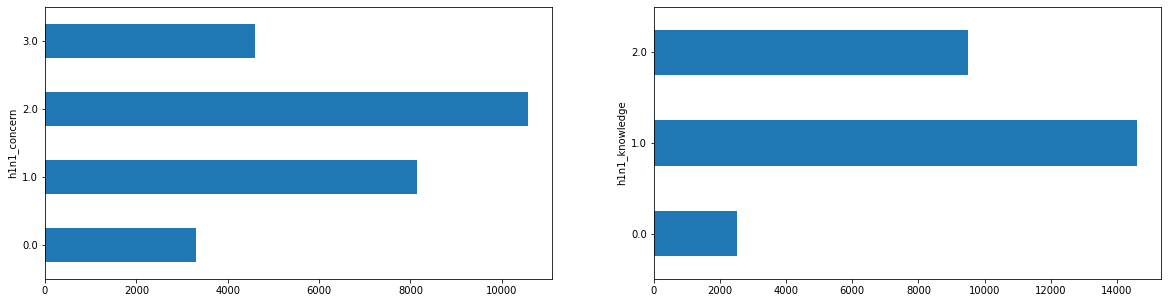

In [7]:
import matplotlib
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2 ,figsize=[20,5])

train.groupby('h1n1_concern')['respondent_id'].count().plot.barh(ax=axes[0])
train.groupby('h1n1_knowledge')['respondent_id'].count().plot.barh(ax=axes[1])

Columns which represent respondents knowledge and awareness indicate **ordinal** type of data

## Respondent Behaviour

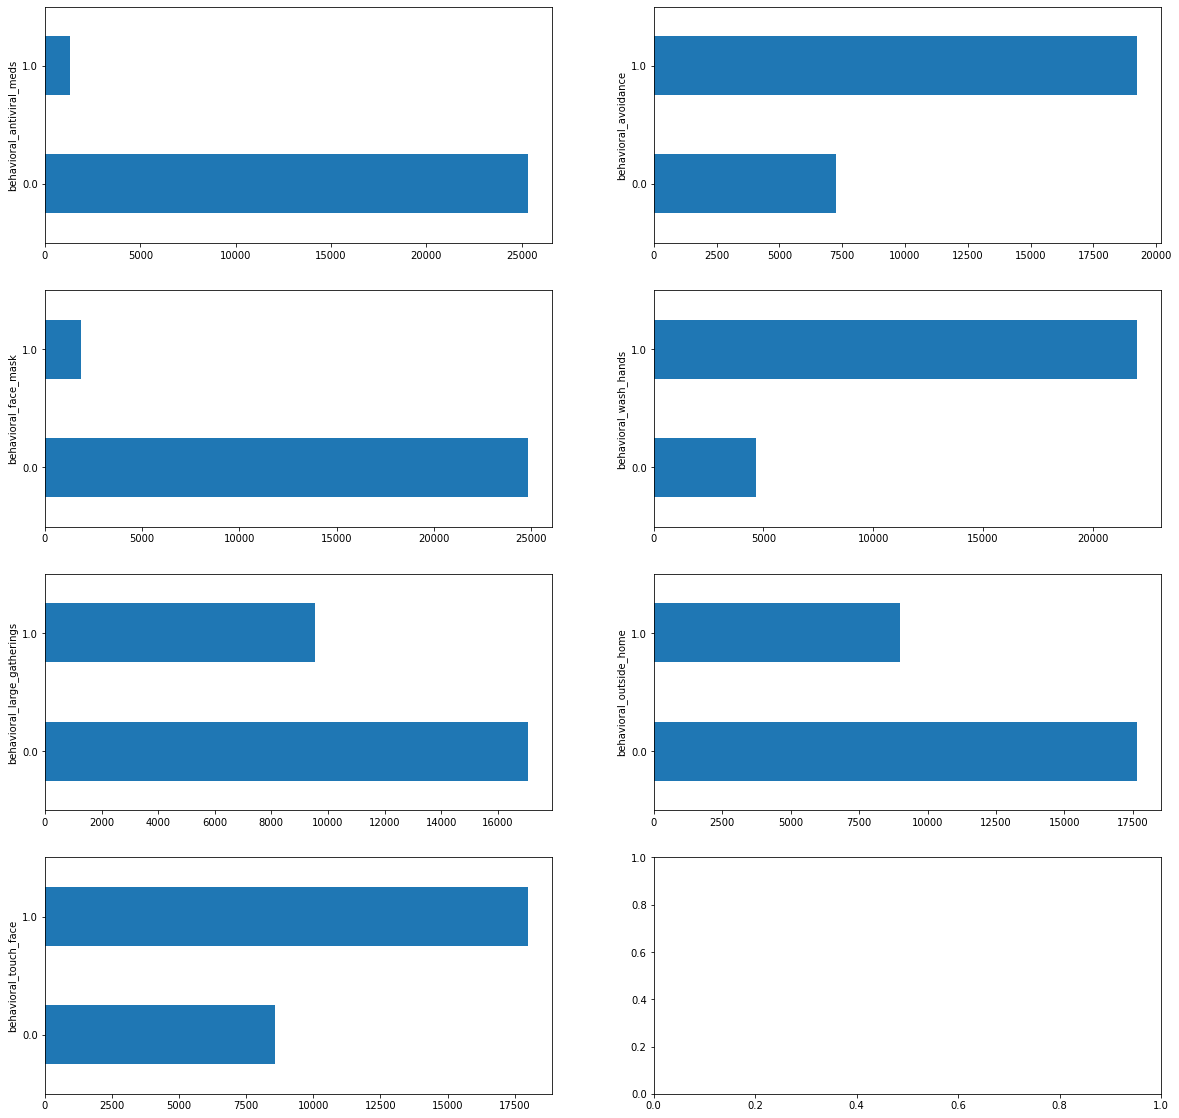

In [8]:
import matplotlib
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=2 ,figsize=[20,20])

train.groupby('behavioral_antiviral_meds')['respondent_id'].count().plot.barh(ax=axes[0,0])
train.groupby('behavioral_avoidance')['respondent_id'].count().plot.barh(ax=axes[0,1])
train.groupby('behavioral_face_mask')['respondent_id'].count().plot.barh(ax=axes[1,0])
train.groupby('behavioral_wash_hands')['respondent_id'].count().plot.barh(ax=axes[1,1])
train.groupby('behavioral_large_gatherings')['respondent_id'].count().plot.barh(ax=axes[2,0])
train.groupby('behavioral_outside_home')['respondent_id'].count().plot.barh(ax=axes[2,1]) 
train.groupby('behavioral_touch_face')['respondent_id'].count().plot.barh(ax=axes[3,0]) 

Columns which represent respondents behaviour indicate **binary** type of data

## Medical Advisories

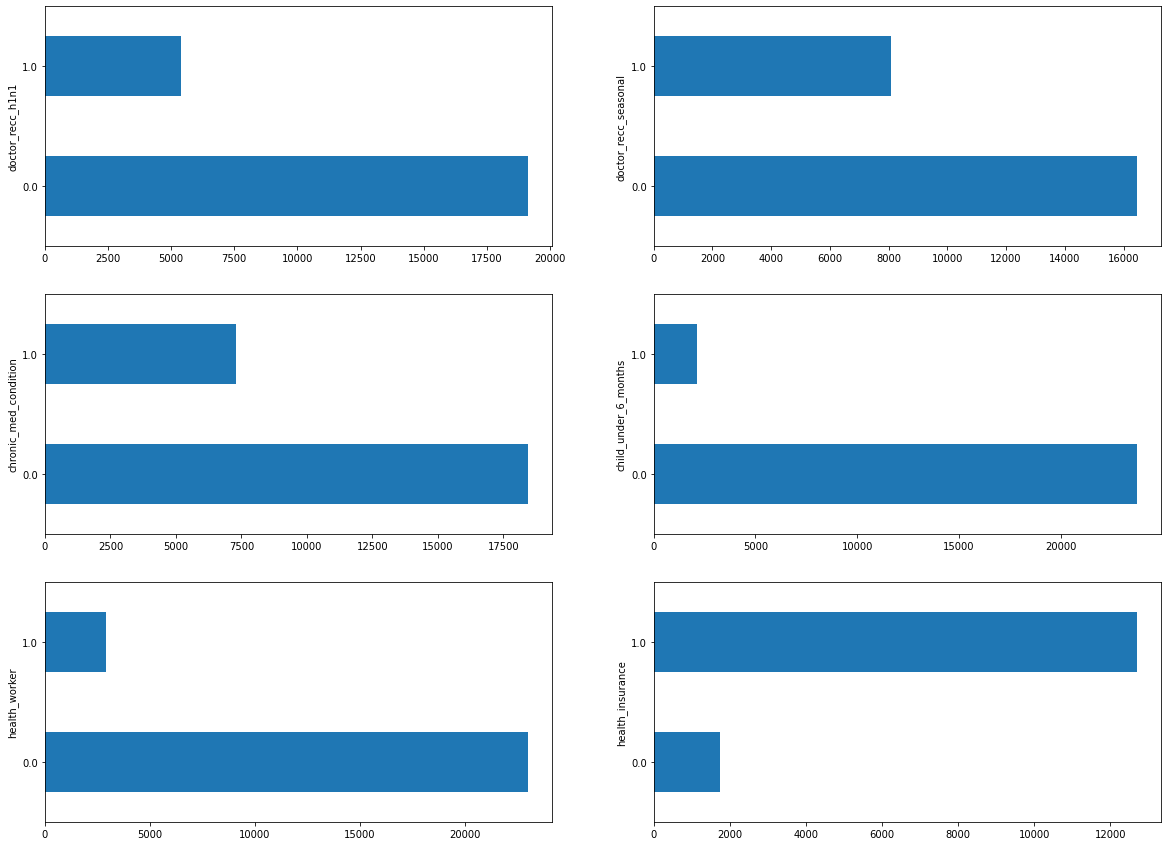

In [9]:
import matplotlib
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=2 ,figsize=[20,15])

train.groupby('doctor_recc_h1n1')['respondent_id'].count().plot.barh(ax=axes[0,0])
train.groupby('doctor_recc_seasonal')['respondent_id'].count().plot.barh(ax=axes[0,1])
train.groupby('chronic_med_condition')['respondent_id'].count().plot.barh(ax=axes[1,0])
train.groupby('child_under_6_months')['respondent_id'].count().plot.barh(ax=axes[1,1])
train.groupby('health_worker')['respondent_id'].count().plot.barh(ax=axes[2,0])
train.groupby('health_insurance')['respondent_id'].count().plot.barh(ax=axes[2,1]) 


Columns which represent respondents medical related information indicate **binary** type of data

## Opinon Based

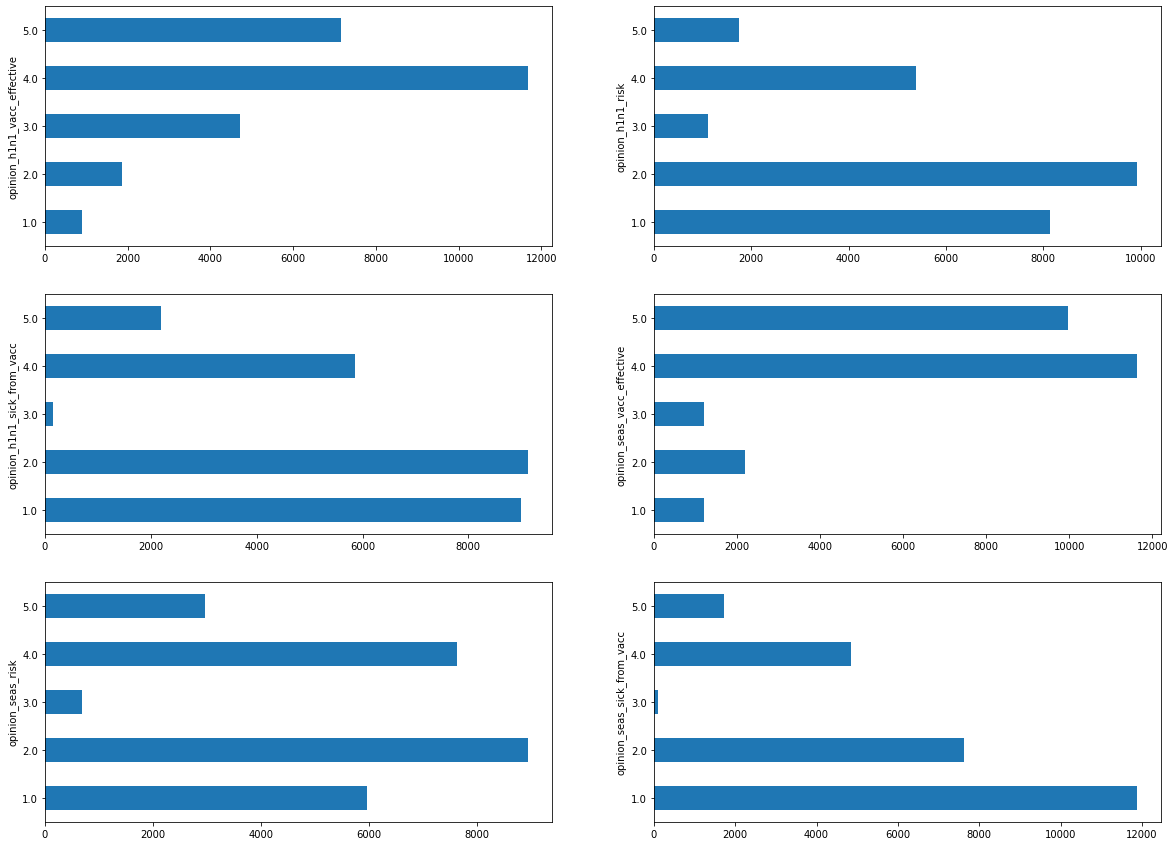

In [10]:
import matplotlib
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=2 ,figsize=[20,15])

train.groupby('opinion_h1n1_vacc_effective')['respondent_id'].count().plot.barh(ax=axes[0,0])
train.groupby('opinion_h1n1_risk')['respondent_id'].count().plot.barh(ax=axes[0,1])
train.groupby('opinion_h1n1_sick_from_vacc')['respondent_id'].count().plot.barh(ax=axes[1,0])
train.groupby('opinion_seas_vacc_effective')['respondent_id'].count().plot.barh(ax=axes[1,1])
train.groupby('opinion_seas_risk')['respondent_id'].count().plot.barh(ax=axes[2,0])
train.groupby('opinion_seas_sick_from_vacc')['respondent_id'].count().plot.barh(ax=axes[2,1]) 


Columns which represent respondents opinion indicate **ordinal** type of data

## Background Based 1

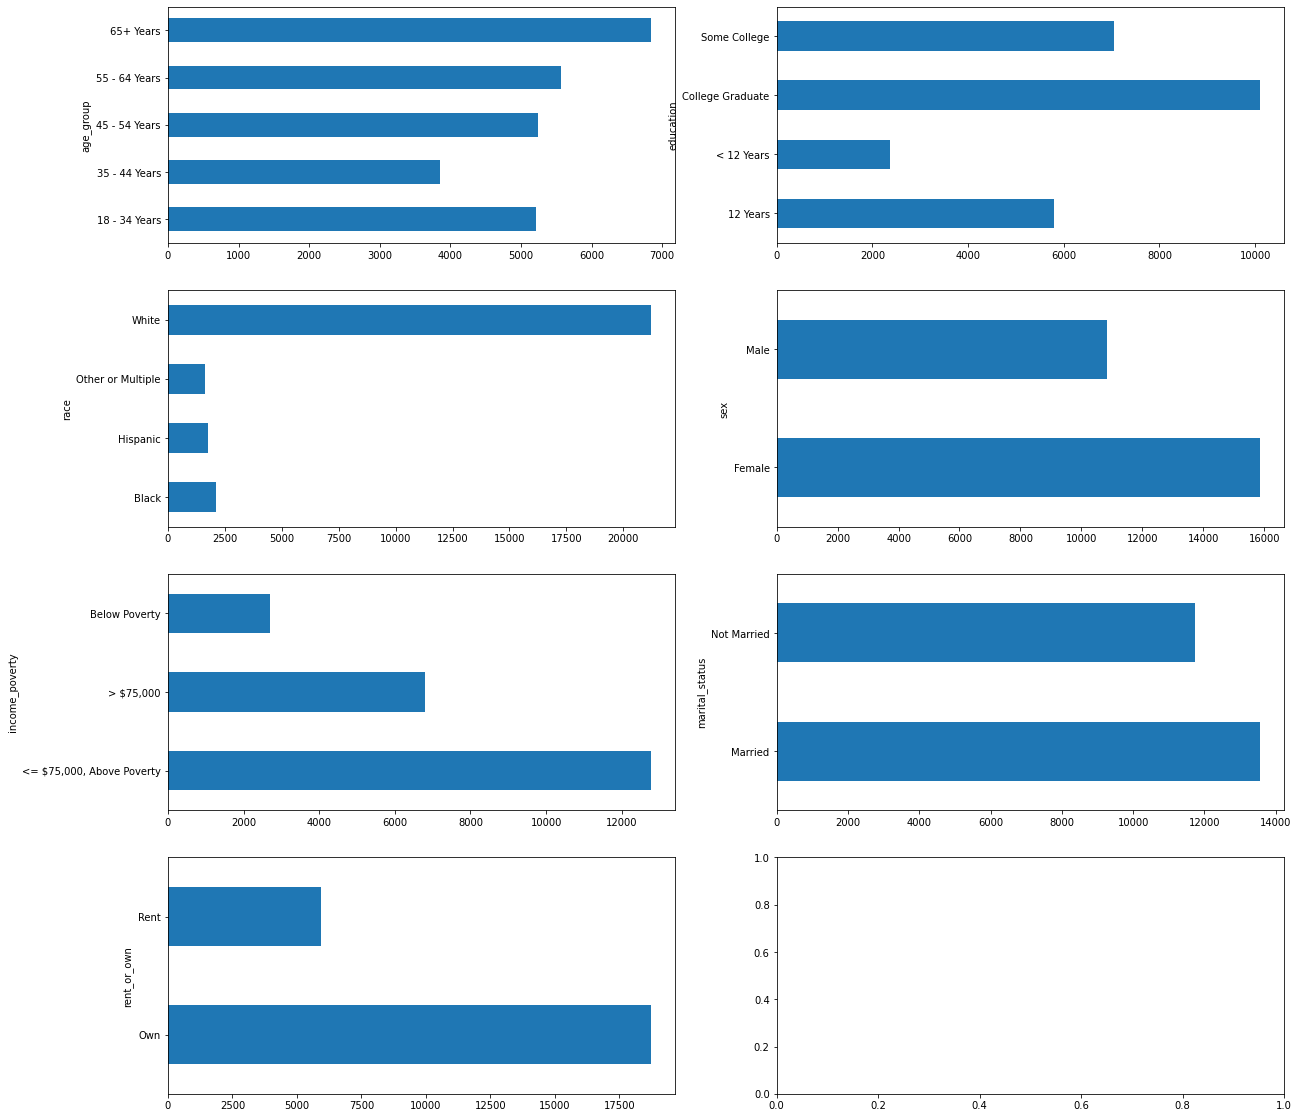

In [11]:
import matplotlib
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=2 ,figsize=[20,20])

train.groupby('age_group')['respondent_id'].count().plot.barh(ax=axes[0,0])
train.groupby('education')['respondent_id'].count().plot.barh(ax=axes[0,1])
train.groupby('race')['respondent_id'].count().plot.barh(ax=axes[1,0])
train.groupby('sex')['respondent_id'].count().plot.barh(ax=axes[1,1])
train.groupby('income_poverty')['respondent_id'].count().plot.barh(ax=axes[2,0])
train.groupby('marital_status')['respondent_id'].count().plot.barh(ax=axes[2,1]) 
train.groupby('rent_or_own')['respondent_id'].count().plot.barh(ax=axes[3,0]) 

## Background Based 2

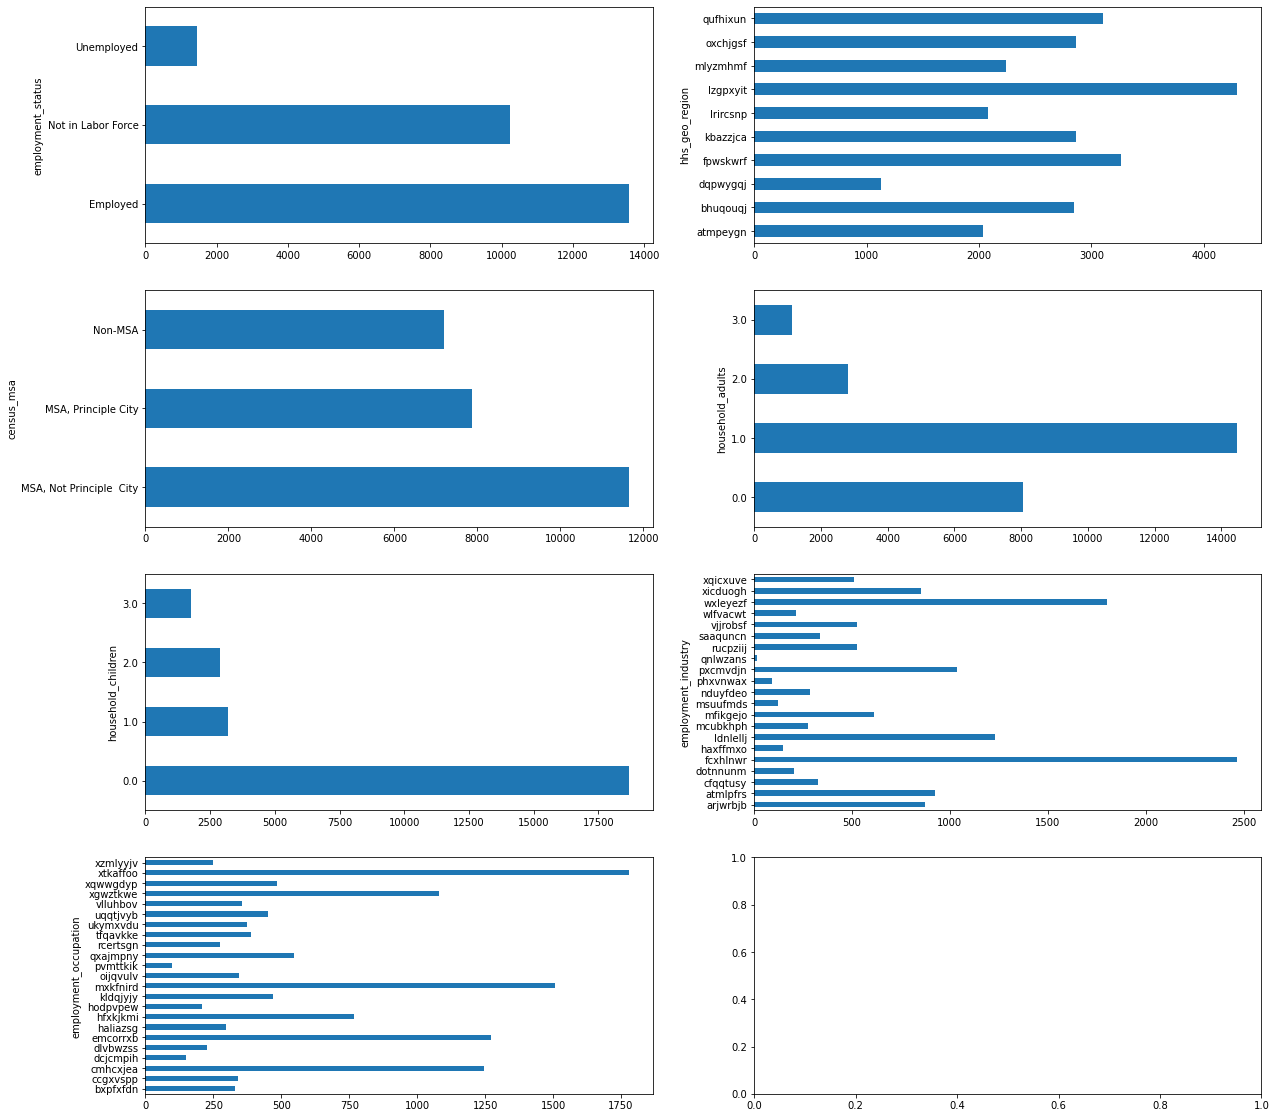

In [12]:
import matplotlib
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=2 ,figsize=[20,20])

train.groupby('employment_status')['respondent_id'].count().plot.barh(ax=axes[0,0])
train.groupby('hhs_geo_region')['respondent_id'].count().plot.barh(ax=axes[0,1])
train.groupby('census_msa')['respondent_id'].count().plot.barh(ax=axes[1,0])
train.groupby('household_adults')['respondent_id'].count().plot.barh(ax=axes[1,1])
train.groupby('household_children')['respondent_id'].count().plot.barh(ax=axes[2,0])
train.groupby('employment_industry')['respondent_id'].count().plot.barh(ax=axes[2,1]) 
train.groupby('employment_occupation')['respondent_id'].count().plot.barh(ax=axes[3,0]) 

Columns which represent respondents background indicate **nominal** type of data

## Train Labels

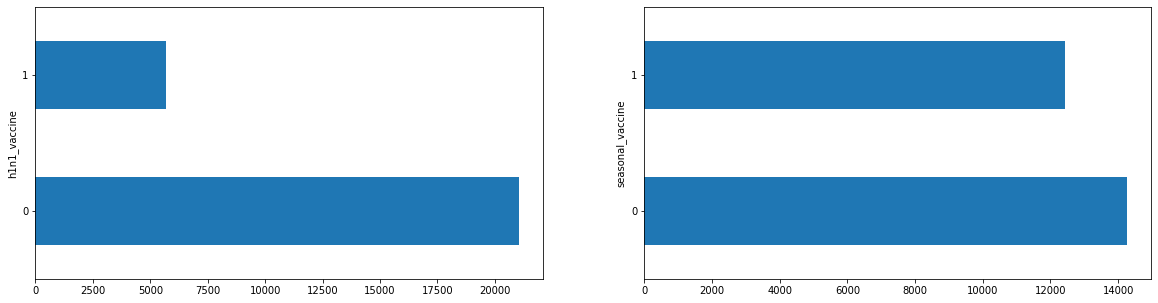

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2 ,figsize=[20,5])

labels.groupby('h1n1_vaccine')['respondent_id'].count().plot.barh(ax=axes[0])
labels.groupby('seasonal_vaccine')['respondent_id'].count().plot.barh(ax=axes[1])


# Question 4 : Dataset Preparation Strategy

The above observation of train dataset indicates requirement for data imputation in both train and test dateset as there are many missing values. The train labels also require either oversampling (SMOTE) or downsampling approach. As there are so many features involve , the downsampling approach will be used for both H1NI and Seasonal vaccine prediction model.


## Data Resampling (Downsampling)

### Resampling for H1N1 Vaccine Receiver Prediction Model

In [14]:
import collections
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable

x=train
y=labels['h1n1_vaccine']

x_h1n1, y_h1n1 = rus.fit_resample(x, y)

print('original dataset shape:', collections.Counter(y))
print('Resample dataset shape', collections.Counter(y_h1n1))

original dataset shape: Counter({0: 21033, 1: 5674})
Resample dataset shape Counter({0: 5674, 1: 5674})


### Resampling for Seasonal Vaccine Receiver Prediction Model

In [15]:
import collections
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable

x=train
y=labels['seasonal_vaccine']

x_seasonal, y_seasonal = rus.fit_resample(x, y)

print('original dataset shape:', collections.Counter(y))
print('Resample dataset shape', collections.Counter(y_seasonal))

original dataset shape: Counter({0: 14272, 1: 12435})
Resample dataset shape Counter({0: 12435, 1: 12435})


## Data Imputation

### Imputation Assumption

1. Replacement of 'null' to '0' for all features related to respondents level of awareness , knowledge and behavioral. 

In [16]:
x_h1n1['h1n1_concern']=x_h1n1['h1n1_concern'].fillna(0).astype(int)
x_h1n1['h1n1_knowledge']=x_h1n1['h1n1_knowledge'].fillna(0).astype(int)
x_h1n1['behavioral_antiviral_meds']=x_h1n1['behavioral_antiviral_meds'].fillna(0).astype(int)
x_h1n1['behavioral_avoidance']=x_h1n1['behavioral_avoidance'].fillna(0).astype(int)
x_h1n1['behavioral_face_mask']=x_h1n1['behavioral_face_mask'].fillna(0).astype(int)
x_h1n1['behavioral_wash_hands']=x_h1n1['behavioral_wash_hands'].fillna(0).astype(int)
x_h1n1['behavioral_large_gatherings']=x_h1n1['behavioral_large_gatherings'].fillna(0).astype(int)
x_h1n1['behavioral_outside_home']=x_h1n1['behavioral_outside_home'].fillna(0).astype(int)
x_h1n1['behavioral_touch_face']=x_h1n1['behavioral_touch_face'].fillna(0).astype(int)

In [17]:
x_seasonal['h1n1_concern']=x_seasonal['h1n1_concern'].fillna(0).astype(int)
x_seasonal['h1n1_knowledge']=x_seasonal['h1n1_knowledge'].fillna(0).astype(int)
x_seasonal['behavioral_antiviral_meds']=x_seasonal['behavioral_antiviral_meds'].fillna(0).astype(int)
x_seasonal['behavioral_avoidance']=x_seasonal['behavioral_avoidance'].fillna(0).astype(int)
x_seasonal['behavioral_face_mask']=x_seasonal['behavioral_face_mask'].fillna(0).astype(int)
x_seasonal['behavioral_wash_hands']=x_seasonal['behavioral_wash_hands'].fillna(0).astype(int)
x_seasonal['behavioral_large_gatherings']=x_seasonal['behavioral_large_gatherings'].fillna(0).astype(int)
x_seasonal['behavioral_outside_home']=x_seasonal['behavioral_outside_home'].fillna(0).astype(int)
x_seasonal['behavioral_touch_face']=x_seasonal['behavioral_touch_face'].fillna(0).astype(int)

In [18]:
test['h1n1_concern']=test['h1n1_concern'].fillna(0).astype(int)
test['h1n1_knowledge']=test['h1n1_knowledge'].fillna(0).astype(int)
test['behavioral_antiviral_meds']=test['behavioral_antiviral_meds'].fillna(0).astype(int)
test['behavioral_avoidance']=test['behavioral_avoidance'].fillna(0).astype(int)
test['behavioral_face_mask']=test['behavioral_face_mask'].fillna(0).astype(int)
test['behavioral_wash_hands']=test['behavioral_wash_hands'].fillna(0).astype(int)
test['behavioral_large_gatherings']=test['behavioral_large_gatherings'].fillna(0).astype(int)
test['behavioral_outside_home']=test['behavioral_outside_home'].fillna(0).astype(int)
test['behavioral_touch_face']=test['behavioral_touch_face'].fillna(0).astype(int)

2. Replacement of 'null' to '0' for features related to doctor recommendation, whereby no recommendation made 

In [19]:
x_h1n1['doctor_recc_h1n1']=x_h1n1['doctor_recc_h1n1'].fillna(0).astype(int)
x_h1n1['doctor_recc_seasonal']=x_h1n1['doctor_recc_seasonal'].fillna(0).astype(int)

In [20]:
x_seasonal['doctor_recc_h1n1']=x_seasonal['doctor_recc_h1n1'].fillna(0).astype(int)
x_seasonal['doctor_recc_seasonal']=x_seasonal['doctor_recc_seasonal'].fillna(0).astype(int)

In [21]:
test['doctor_recc_h1n1']=test['doctor_recc_h1n1'].fillna(0).astype(int)
test['doctor_recc_seasonal']=test['doctor_recc_seasonal'].fillna(0).astype(int)

3. Replacement of 'null' to '0' assuming that the respondents might not even have a child and have any frequent connection with children ,not a health worker, do not have health insurance and not chronic medical condition . Assuming that the respondent would know if they have any of the above.

In [22]:
x_h1n1['child_under_6_months']=x_h1n1['child_under_6_months'].fillna(0).astype(int)
x_h1n1['health_worker']=x_h1n1['health_worker'].fillna(0).astype(int)
x_h1n1['health_insurance']=x_h1n1['health_insurance'].fillna(0).astype(int)
x_h1n1['chronic_med_condition']=x_h1n1['chronic_med_condition'].fillna(0).astype(int)

In [23]:
x_seasonal['child_under_6_months']=x_seasonal['child_under_6_months'].fillna(0).astype(int)
x_seasonal['health_worker']=x_seasonal['health_worker'].fillna(0).astype(int)
x_seasonal['health_insurance']=x_seasonal['health_insurance'].fillna(0).astype(int)
x_seasonal['chronic_med_condition']=x_seasonal['chronic_med_condition'].fillna(0).astype(int)

In [24]:
test['child_under_6_months']=test['child_under_6_months'].fillna(0).astype(int)
test['health_worker']=test['health_worker'].fillna(0).astype(int)
test['health_insurance']=test['health_insurance'].fillna(0).astype(int)
test['chronic_med_condition']=test['chronic_med_condition'].fillna(0).astype(int)

4. Replacement of 'null' to '3' assuming respondents are undecideable or not really sure on their opinions

In [25]:
x_h1n1['opinion_h1n1_vacc_effective']=x_h1n1['opinion_h1n1_vacc_effective'].fillna(3).astype(int)
x_h1n1['opinion_h1n1_risk']=x_h1n1['opinion_h1n1_risk'].fillna(3).astype(int)
x_h1n1['opinion_h1n1_sick_from_vacc']=x_h1n1['opinion_h1n1_sick_from_vacc'].fillna(3).astype(int)
x_h1n1['opinion_seas_vacc_effective']=x_h1n1['opinion_seas_vacc_effective'].fillna(3).astype(int)
x_h1n1['opinion_seas_risk']=x_h1n1['opinion_seas_risk'].fillna(3).astype(int)
x_h1n1['opinion_seas_sick_from_vacc']=x_h1n1['opinion_seas_sick_from_vacc'].fillna(3).astype(int)

In [26]:
x_seasonal['opinion_h1n1_vacc_effective']=x_seasonal['opinion_h1n1_vacc_effective'].fillna(3).astype(int)
x_seasonal['opinion_h1n1_risk']=x_seasonal['opinion_h1n1_risk'].fillna(3).astype(int)
x_seasonal['opinion_h1n1_sick_from_vacc']=x_seasonal['opinion_h1n1_sick_from_vacc'].fillna(3).astype(int)
x_seasonal['opinion_seas_vacc_effective']=x_seasonal['opinion_seas_vacc_effective'].fillna(3).astype(int)
x_seasonal['opinion_seas_risk']=x_seasonal['opinion_seas_risk'].fillna(3).astype(int)
x_seasonal['opinion_seas_sick_from_vacc']=x_seasonal['opinion_seas_sick_from_vacc'].fillna(3).astype(int)

In [27]:
test['opinion_h1n1_vacc_effective']=test['opinion_h1n1_vacc_effective'].fillna(3).astype(int)
test['opinion_h1n1_risk']=test['opinion_h1n1_risk'].fillna(3).astype(int)
test['opinion_h1n1_sick_from_vacc']=test['opinion_h1n1_sick_from_vacc'].fillna(3).astype(int)
test['opinion_seas_vacc_effective']=test['opinion_seas_vacc_effective'].fillna(3).astype(int)
test['opinion_seas_risk']=test['opinion_seas_risk'].fillna(3).astype(int)
test['opinion_seas_sick_from_vacc']=test['opinion_seas_sick_from_vacc'].fillna(3).astype(int)

5. Replacement of 'null' to 'Some College' category for x_h1n1 , to '12 Years' for x_seasonal and to '12 Years' category for test dataset considering **nearest** to mean count of respondents which indicate their education level.

In [28]:
x_h1n1[x_h1n1['education'].notnull()].groupby('education')['respondent_id'].count().reset_index().rename(columns={'respondent_id':'average count'}).mean(axis=0)

average count    2699.25
dtype: float64

In [29]:
edu_train_h1n1=x_h1n1[x_h1n1['education'].notnull()].groupby('education')['respondent_id'].count().reset_index().rename(columns={'respondent_id':'count'})
edu_train_h1n1['dif_avg']=abs(edu_train_h1n1['count']-2700)
edu_train_h1n1

,education,count,dif_avg
0,12 Years,2333,367
1,< 12 Years,930,1770
2,College Graduate,4561,1861
3,Some College,2973,273


In [30]:
x_seasonal[x_seasonal['education'].notnull()].groupby('education')['respondent_id'].count().reset_index().rename(columns={'respondent_id':'average count'}).mean(axis=0)


average count    5903.25
dtype: float64

In [31]:
edu_train_seasonal=x_seasonal[x_seasonal['education'].notnull()].groupby('education')['respondent_id'].count().reset_index().rename(columns={'respondent_id':'count'})
edu_train_seasonal['dif_avg']=abs(edu_train_seasonal['count']-5903)
edu_train_seasonal

,education,count,dif_avg
0,12 Years,5374,529
1,< 12 Years,2209,3694
2,College Graduate,9499,3596
3,Some College,6531,628


In [32]:
test[test['education'].notnull()].groupby('education')['respondent_id'].count().reset_index().rename(columns={'respondent_id':'count'}).mean(axis=0)

count    6325.25
dtype: float64

In [33]:
edu_test=test[test['education'].notnull()].groupby('education')['respondent_id'].count().reset_index().rename(columns={'respondent_id':'count'})
edu_test['dif_avg']=abs(edu_test['count']-6325.25) 
edu_test

,education,count,dif_avg
0,12 Years,5699,626.25
1,< 12 Years,2336,3989.25
2,College Graduate,10186,3860.75
3,Some College,7080,754.75


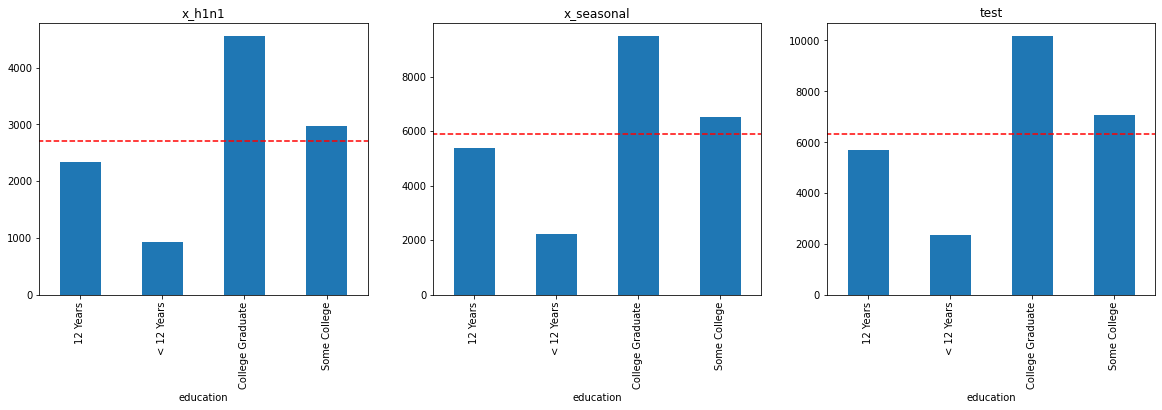

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=3 ,figsize=[20,5])

x_h1n1.groupby('education')['respondent_id'].count().plot.bar(ax=axes[0],title='x_h1n1').hlines(2700, xmin=-1, xmax=5, linestyles='dashed',color='red') 
x_seasonal.groupby('education')['respondent_id'].count().plot.bar(ax=axes[1],title='x_seasonal').hlines(5903, xmin=-1, xmax=5, linestyles='dashed',color='red') 
test.groupby('education')['respondent_id'].count().plot.bar(ax=axes[2],title='test').hlines(6325.25, xmin=-1, xmax=5, linestyles='dashed',color='red') 

In [35]:
x_h1n1['education']=x_h1n1['education'].fillna('Some College').astype(str)
x_seasonal['education']=x_seasonal['education'].fillna('12 Years').astype(str)
test['education']=test['education'].fillna('12 Years').astype(str)

6. Replacement of 'null' to '> 75,000' category for x_h1n1, x_seasonal and test considering **nearest** to mean count of respondents which indicate their income poverty.

In [36]:
x_h1n1[x_h1n1['income_poverty'].notnull()].groupby('education')['respondent_id'].count().reset_index().rename(columns={'respondent_id':'average count'}).mean(axis=0)

average count    2379.0
dtype: float64

In [37]:
income_poverty_h1n1=x_h1n1[x_h1n1['income_poverty'].notnull()].groupby('income_poverty')['respondent_id'].count().reset_index().rename(columns={'respondent_id':'count'})
income_poverty_h1n1['dif_avg']=abs(income_poverty_h1n1['count']-2379.0)
income_poverty_h1n1

,income_poverty,count,dif_avg
0,"<= $75,000, Above Poverty",5317,2938.0
1,"> $75,000",3107,728.0
2,Below Poverty,1092,1287.0


In [38]:
x_seasonal[x_seasonal['income_poverty'].notnull()].groupby('education')['respondent_id'].count().reset_index().rename(columns={'respondent_id':'average count'}).mean(axis=0)

average count    5192.5
dtype: float64

In [39]:
income_poverty_seasonal=x_seasonal[x_seasonal['income_poverty'].notnull()].groupby('income_poverty')['respondent_id'].count().reset_index().rename(columns={'respondent_id':'count'})
income_poverty_seasonal['dif_avg']=abs(income_poverty_h1n1['count']-5192.5)
income_poverty_seasonal

,income_poverty,count,dif_avg
0,"<= $75,000, Above Poverty",11982,124.5
1,"> $75,000",6336,2085.5
2,Below Poverty,2452,4100.5


In [40]:
test[test['income_poverty'].notnull()].groupby('education')['respondent_id'].count().reset_index().rename(columns={'respondent_id':'average count'}).mean(axis=0)

average count    5552.75
dtype: float64

In [41]:
income_poverty_test=test[test['income_poverty'].notnull()].groupby('income_poverty')['respondent_id'].count().reset_index().rename(columns={'respondent_id':'count'})
income_poverty_test['dif_avg']=abs(income_poverty_test['count']-5552.75)
income_poverty_test

,income_poverty,count,dif_avg
0,"<= $75,000, Above Poverty",12775,7222.25
1,"> $75,000",6863,1310.25
2,Below Poverty,2573,2979.75


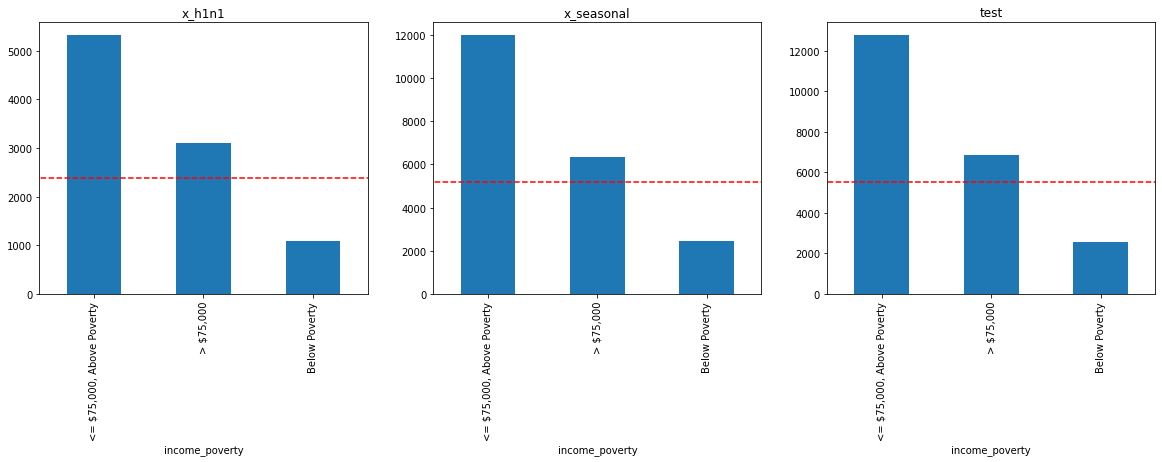

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=3 ,figsize=[20,5])

x_h1n1.groupby('income_poverty')['respondent_id'].count().plot.bar(ax=axes[0],title='x_h1n1').hlines(2379.0, xmin=-1, xmax=5, linestyles='dashed',color='red') 
x_seasonal.groupby('income_poverty')['respondent_id'].count().plot.bar(ax=axes[1],title='x_seasonal').hlines(5192.5, xmin=-1, xmax=5, linestyles='dashed',color='red') 
test.groupby('income_poverty')['respondent_id'].count().plot.bar(ax=axes[2],title='test').hlines(5552.75, xmin=-1, xmax=5, linestyles='dashed',color='red') 

In [43]:
x_h1n1['income_poverty']=x_h1n1['income_poverty'].fillna('> $75,000').astype(str)
x_seasonal['income_poverty']=x_seasonal['income_poverty'].fillna('> $75,000').astype(str)
test['income_poverty']=test['income_poverty'].fillna('> $75,000').astype(str)

7. Replacement of 'null' to 'Not Married' category for x_h1n1,x_seasonal and test considering the **least count** since **nearest** to mean count for both categories are equal.

In [44]:
x_h1n1[x_h1n1['marital_status'].notnull()].groupby('marital_status')['respondent_id'].count().reset_index().rename(columns={'respondent_id':'average count'}).mean(axis=0)

average count    5395.0
dtype: float64

In [45]:
marital_status_h1n1=x_h1n1[x_h1n1['marital_status'].notnull()].groupby('marital_status')['respondent_id'].count().reset_index().rename(columns={'respondent_id':'count'})
marital_status_h1n1['dif_avg']=abs(marital_status_h1n1['count']-5395.0)
marital_status_h1n1

,marital_status,count,dif_avg
0,Married,5948,553.0
1,Not Married,4842,553.0


In [46]:
x_seasonal[x_seasonal['marital_status'].notnull()].groupby('marital_status')['respondent_id'].count().reset_index().rename(columns={'respondent_id':'average count'}).mean(axis=0)

average count    11803.5
dtype: float64

In [47]:
marital_status_seasonal=x_seasonal[x_seasonal['marital_status'].notnull()].groupby('marital_status')['respondent_id'].count().reset_index().rename(columns={'respondent_id':'count'})
marital_status_seasonal['dif_avg']=abs(marital_status_seasonal['count']-11803.5)
marital_status_seasonal

,marital_status,count,dif_avg
0,Married,12704,900.5
1,Not Married,10903,900.5


In [48]:
test[test['marital_status'].notnull()].groupby('marital_status')['respondent_id'].count().reset_index().rename(columns={'respondent_id':'average count'}).mean(axis=0)

average count    12633.0
dtype: float64

In [49]:
marital_status_test=test[test['marital_status'].notnull()].groupby('marital_status')['respondent_id'].count().reset_index().rename(columns={'respondent_id':'count'})
marital_status_test['dif_avg']=abs(marital_status_test['count']-12633.0)
marital_status_test

,marital_status,count,dif_avg
0,Married,13548,915.0
1,Not Married,11718,915.0


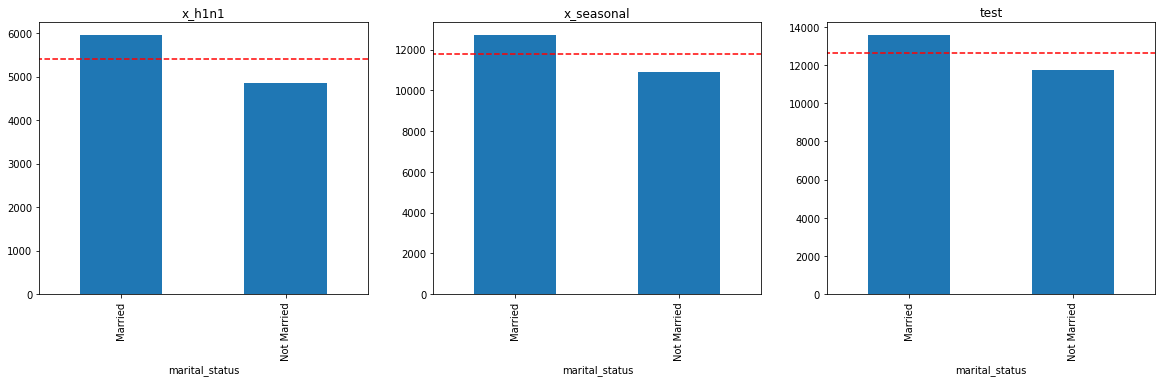

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=3 ,figsize=[20,5])

x_h1n1.groupby('marital_status')['respondent_id'].count().plot.bar(ax=axes[0],title='x_h1n1').hlines(5395.0, xmin=-1, xmax=5, linestyles='dashed',color='red') 
x_seasonal.groupby('marital_status')['respondent_id'].count().plot.bar(ax=axes[1],title='x_seasonal').hlines(11803.5, xmin=-1, xmax=5, linestyles='dashed',color='red') 
test.groupby('marital_status')['respondent_id'].count().plot.bar(ax=axes[2],title='test').hlines(12633.0, xmin=-1, xmax=5, linestyles='dashed',color='red') 



In [51]:
x_h1n1['marital_status']=x_h1n1['marital_status'].fillna('Not Married').astype(str)
x_seasonal['marital_status']=x_seasonal['marital_status'].fillna('Not Married').astype(str)
test['marital_status']=test['marital_status'].fillna('Not Married').astype(str)

8. Replacement of 'null' to 'Rent' category for x_h1n1, x_seasonal and test considering the **least count** since **nearest** to mean count for both categories are equal.

In [52]:
x_h1n1[x_h1n1['rent_or_own'].notnull()].groupby('rent_or_own')['respondent_id'].count().reset_index().rename(columns={'respondent_id':'average count'}).mean(axis=0)

average count    5259.5
dtype: float64

In [53]:
rent_or_own_h1n1=x_h1n1[x_h1n1['rent_or_own'].notnull()].groupby('rent_or_own')['respondent_id'].count().reset_index().rename(columns={'respondent_id':'count'})
rent_or_own_h1n1['dif_avg']=abs(rent_or_own_h1n1['count']-5259.5)
rent_or_own_h1n1

,rent_or_own,count,dif_avg
0,Own,8082,2822.5
1,Rent,2437,2822.5


In [54]:
x_seasonal[x_seasonal['rent_or_own'].notnull()].groupby('rent_or_own')['respondent_id'].count().reset_index().rename(columns={'respondent_id':'average count'}).mean(axis=0)

average count    11511.5
dtype: float64

In [55]:
rent_or_own_seasonal=x_seasonal[x_seasonal['rent_or_own'].notnull()].groupby('rent_or_own')['respondent_id'].count().reset_index().rename(columns={'respondent_id':'count'})
rent_or_own_seasonal['dif_avg']=abs(rent_or_own_seasonal['count']-11511.5)
rent_or_own_seasonal

,rent_or_own,count,dif_avg
0,Own,17524,6012.5
1,Rent,5499,6012.5


In [56]:
test[test['rent_or_own'].notnull()].groupby('rent_or_own')['respondent_id'].count().reset_index().rename(columns={'respondent_id':'average count'}).mean(axis=0)

average count    12336.0
dtype: float64

In [57]:
rent_or_own_test=test[test['rent_or_own'].notnull()].groupby('rent_or_own')['respondent_id'].count().reset_index().rename(columns={'respondent_id':'count'})
rent_or_own_test['dif_avg']=abs(rent_or_own_test['count']-12336.0)
rent_or_own_test

,rent_or_own,count,dif_avg
0,Own,18721,6385.0
1,Rent,5951,6385.0


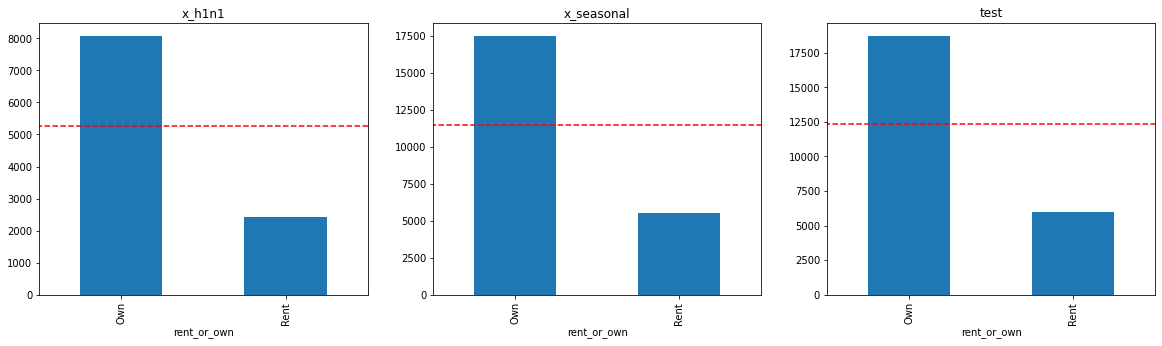

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=3 ,figsize=[20,5])

x_h1n1.groupby('rent_or_own')['respondent_id'].count().plot.bar(ax=axes[0],title='x_h1n1').hlines(5259.5, xmin=-1, xmax=5, linestyles='dashed',color='red') 
x_seasonal.groupby('rent_or_own')['respondent_id'].count().plot.bar(ax=axes[1],title='x_seasonal').hlines(11511.5, xmin=-1, xmax=5, linestyles='dashed',color='red') 
test.groupby('rent_or_own')['respondent_id'].count().plot.bar(ax=axes[2],title='test').hlines(12336.0, xmin=-1, xmax=5, linestyles='dashed',color='red') 


In [59]:
x_h1n1['rent_or_own']=x_h1n1['rent_or_own'].fillna('Rent').astype(str)
x_seasonal['rent_or_own']=x_seasonal['rent_or_own'].fillna('Rent').astype(str)
test['rent_or_own']=test['rent_or_own'].fillna('Rent').astype(str)

9. Replacement of 'null' to '0' for x_h1n1, x_seasonal and test considering respondent live alone for (other) household_adults data

In [60]:
x_h1n1.groupby('household_adults')['respondent_id'].count()

household_adults
0.0    3276
1.0    6324
2.0    1179
3.0     479
Name: respondent_id, dtype: int64

In [61]:
x_seasonal.groupby('household_adults')['respondent_id'].count()

household_adults
0.0     7500
1.0    13508
2.0     2571
3.0     1070
Name: respondent_id, dtype: int64

In [62]:
test.groupby('household_adults')['respondent_id'].count()

household_adults
0.0     7943
1.0    14533
2.0     2870
3.0     1137
Name: respondent_id, dtype: int64

In [63]:
x_h1n1['household_adults']=x_h1n1['household_adults'].fillna('0').astype(str)
x_seasonal['household_adults']=x_seasonal['household_adults'].fillna('0').astype(str)
test['household_adults']=test['household_adults'].fillna('0').astype(str)

10. Replacement of 'null' to '0' for x_h1n1, x_seasonal and test considering no children in the household

In [64]:
x_h1n1.groupby('household_children')['respondent_id'].count()

household_children
0.0    8000
1.0    1346
2.0    1204
3.0     708
Name: respondent_id, dtype: int64

In [65]:
x_seasonal.groupby('household_children')['respondent_id'].count()

household_children
0.0    17522
1.0     2892
2.0     2621
3.0     1614
Name: respondent_id, dtype: int64

In [66]:
test.groupby('household_children')['respondent_id'].count()

household_children
0.0    18571
1.0     3228
2.0     2880
3.0     1804
Name: respondent_id, dtype: int64

In [67]:
x_h1n1['household_children']=x_h1n1['household_children'].fillna('0').astype(str)
x_seasonal['household_children']=x_seasonal['household_children'].fillna('0').astype(str)
test['household_children']=test['household_children'].fillna('0').astype(str)

11. Replacement of 'null' within employment related features

In [68]:
x_h1n1[x_h1n1['employment_status'].notnull()].groupby('employment_status')['respondent_id'].count()

employment_status
Employed              5798
Not in Labor Force    4431
Unemployed             547
Name: respondent_id, dtype: int64

In [69]:
x_seasonal[x_seasonal['employment_status'].notnull()].groupby('employment_status')['respondent_id'].count()

employment_status
Employed              12629
Not in Labor Force     9626
Unemployed             1303
Name: respondent_id, dtype: int64

In [70]:
test[test['employment_status'].notnull()].groupby('employment_status')['respondent_id'].count()

employment_status
Employed              13632
Not in Labor Force    10092
Unemployed             1513
Name: respondent_id, dtype: int64

11.1 Assumption that respondents with null value in employment_industry and employment_occupation to be under the category of either 'Unemployed' or 'Not in Labor Force' within the employment_status feature . Below filtered data for both train and test prove the assumption. Therefore, the employment_status feature with the null value to be imputed with 'Unemployed' whereby null values also indicated in employment_industry and employment_occupation features. The value 'Unemployed' chosen instead of 'Not in Labor Force' due to lowest size of data within this category

In [71]:
x_h1n1[(x_h1n1['employment_status']=='Not in Labor Force')
     &(x_h1n1['employment_industry'].notnull())
     &(x_h1n1['employment_occupation'].notnull())].count()['respondent_id']

0

In [72]:
x_h1n1[(x_h1n1['employment_status']=='Unemployed')
     &(x_h1n1['employment_industry'].notnull())
     &(x_h1n1['employment_occupation'].notnull())].count()['respondent_id']

0

In [73]:
x_seasonal[(x_seasonal['employment_status']=='Not in Labor Force')
     &(x_seasonal['employment_industry'].notnull())
     &(x_seasonal['employment_occupation'].notnull())].count()['respondent_id']

0

In [74]:
x_seasonal[(x_seasonal['employment_status']=='Unemployed')
     &(x_seasonal['employment_industry'].notnull())
     &(x_seasonal['employment_occupation'].notnull())].count()['respondent_id']

0

In [75]:
test[(test['employment_status']=='Not in Labor Force')
     &(test['employment_industry'].notnull())
     &(test['employment_occupation'].notnull())].count()['respondent_id']

0

In [76]:
test[(test['employment_status']=='Unemployed')
     &(test['employment_industry'].notnull())
     &(test['employment_occupation'].notnull())].count()['respondent_id']

0

In [77]:
x_h1n1['employment_status']=np.where(((x_h1n1['employment_status'].isnull()) & (x_h1n1['employment_industry'].isnull()) &
                                    (x_h1n1['employment_occupation'].isnull())),'Unemployed',x_h1n1['employment_status'])


x_seasonal['employment_status']=np.where(((x_seasonal['employment_status'].isnull()) & (x_seasonal['employment_industry'].isnull()) &
                                    (x_seasonal['employment_occupation'].isnull())),'Unemployed',x_seasonal['employment_status'])


test['employment_status']=np.where(((test['employment_status'].isnull()) & (test['employment_industry'].isnull()) &
                                    (test['employment_occupation'].isnull())),'Unemployed',test['employment_status'])

So, using the above rules for both train and test data, there's no more null value.

In [78]:
x_h1n1[x_h1n1['employment_status'].isnull()]

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation


In [79]:
x_seasonal[x_seasonal['employment_status'].isnull()]

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation


In [80]:
test[test['employment_status'].isnull()]

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation


11.2 Imputation of respondent's employment_industry and employment_occupation with 'na' value whereby the employment status either 'Not in Labor Force' or 'Unemployed'

In [81]:
x_h1n1['employment_industry']=np.where(((x_h1n1['employment_status']=='Not in Labor Force') | (x_h1n1['employment_status']=='Unemployed')),'na',x_h1n1['employment_industry'])
x_h1n1['employment_occupation']=np.where(((x_h1n1['employment_status']=='Not in Labor Force') | (x_h1n1['employment_status']=='Unemployed')),'na',x_h1n1['employment_occupation'])

x_seasonal['employment_industry']=np.where(((x_seasonal['employment_status']=='Not in Labor Force') | (x_seasonal['employment_status']=='Unemployed')),'na',x_seasonal['employment_industry'])
x_seasonal['employment_occupation']=np.where(((x_seasonal['employment_status']=='Not in Labor Force') | (x_seasonal['employment_status']=='Unemployed')),'na',x_seasonal['employment_occupation'])

test['employment_industry']=np.where(((test['employment_status']=='Not in Labor Force') | (test['employment_status']=='Unemployed')),'na',test['employment_industry'])
test['employment_occupation']=np.where(((test['employment_status']=='Not in Labor Force') | (test['employment_status']=='Unemployed')),'na',test['employment_occupation'])


11.3 Imputation of respondent which employment_status is 'Employed' but with the status 'null' in employment_industry and employment_occupation by assuming this category of respondents to be placed under group of employment_industry & employment_occupation with the highest counts. The following table indicates count for (employment industry and occupation)

In [82]:
x_h1n1[x_h1n1['employment_status']=='Employed'].groupby(['employment_status','employment_industry','employment_occupation'])['respondent_id'].count().sort_values()

employment_status  employment_industry  employment_occupation
Employed           nduyfdeo             xgwztkwe                   1
                   xqicxuve             dlvbwzss                   1
                   ldnlellj             dlvbwzss                   1
                   mfikgejo             emcorrxb                   1
                   phxvnwax             uqqtjvyb                   1
                                                                ... 
                   fcxhlnwr             haliazsg                 164
                   xicduogh             qxajmpny                 170
                   pxcmvdjn             xgwztkwe                 230
                   wxleyezf             emcorrxb                 503
                   fcxhlnwr             cmhcxjea                 713
Name: respondent_id, Length: 269, dtype: int64

In [83]:
x_seasonal[x_seasonal['employment_status']=='Employed'].groupby(['employment_status','employment_industry','employment_occupation'])['respondent_id'].count().sort_values()

employment_status  employment_industry  employment_occupation
Employed           phxvnwax             hfxkjkmi                    1
                   wlfvacwt             rcertsgn                    1
                   phxvnwax             hodpvpew                    1
                   rucpziij             ukymxvdu                    1
                   nduyfdeo             kldqjyjy                    1
                                                                 ... 
                   atmlpfrs             xqwwgdyp                  291
                   xicduogh             qxajmpny                  437
                   pxcmvdjn             xgwztkwe                  557
                   fcxhlnwr             cmhcxjea                 1054
                   wxleyezf             emcorrxb                 1087
Name: respondent_id, Length: 298, dtype: int64

In [84]:
test[test['employment_status']=='Employed'].groupby(['employment_status','employment_industry','employment_occupation'])['respondent_id'].count().sort_values()

employment_status  employment_industry  employment_occupation
Employed           xqicxuve             xzmlyyjv                    1
                   rucpziij             emcorrxb                    1
                                        hodpvpew                    1
                                        kldqjyjy                    1
                                        ukymxvdu                    1
                                                                 ... 
                                        tfqavkke                  329
                   xicduogh             qxajmpny                  429
                   pxcmvdjn             xgwztkwe                  639
                   fcxhlnwr             cmhcxjea                 1095
                   wxleyezf             emcorrxb                 1185
Name: respondent_id, Length: 322, dtype: int64

In [85]:
x_h1n1['employment_industry']=np.where(((x_h1n1['employment_status']=='Employed') & (x_h1n1['employment_industry'].isnull()) & (x_h1n1['employment_occupation'].isnull())
                                      ),'fcxhlnwr',x_h1n1['employment_industry'])

x_h1n1['employment_occupation']=np.where(((x_h1n1['employment_status']=='Employed') & (x_h1n1['employment_industry'].isnull()) & (x_h1n1['employment_occupation'].isnull())
                                      ),'cmhcxjea',x_h1n1['employment_occupation'])

x_seasonal['employment_industry']=np.where(((x_seasonal['employment_status']=='Employed') & (x_seasonal['employment_industry'].isnull()) & (x_seasonal['employment_occupation'].isnull())
                                      ),'wxleyezf',x_seasonal['employment_industry'])

x_seasonal['employment_occupation']=np.where(((x_seasonal['employment_status']=='Employed') & (x_seasonal['employment_industry'].isnull()) & (x_seasonal['employment_occupation'].isnull())
                                      ),'emcorrxb',x_seasonal['employment_occupation'])


test['employment_industry']=np.where(((test['employment_status']=='Employed') & (test['employment_industry'].isnull()) & (test['employment_occupation'].isnull())
                                      ),'wxleyezf',test['employment_industry'])

test['employment_occupation']=np.where(((test['employment_status']=='Employed') & (test['employment_industry'].isnull()) & (test['employment_occupation'].isnull())
                                      ),'emcorrxb',test['employment_occupation'])


11.4 Imputation of respondent which employment_status is 'Employed' but with the status 'null' in employment_industry by assuming this category of respondents to be placed under group of employment_industry with the highest counts.

In [86]:
x_h1n1[x_h1n1['employment_status']=='Employed'].groupby(['employment_status','employment_industry'])['respondent_id'].count().sort_values()

employment_status  employment_industry
Employed           qnlwzans                  4
                   phxvnwax                 39
                   msuufmds                 56
                   dotnnunm                 60
                   wlfvacwt                 89
                   mcubkhph                 93
                   haxffmxo                109
                   nduyfdeo                111
                   cfqqtusy                121
                   saaquncn                131
                   vjjrobsf                184
                   xqicxuve                190
                   rucpziij                198
                   mfikgejo                229
                   xicduogh                307
                   atmlpfrs                320
                   arjwrbjb                383
                   pxcmvdjn                386
                   ldnlellj                486
                   wxleyezf                790
                   fc

In [87]:
x_seasonal[x_seasonal['employment_status']=='Employed'].groupby(['employment_status','employment_industry'])['respondent_id'].count().sort_values()

employment_status  employment_industry
Employed           qnlwzans                 13
                   phxvnwax                 68
                   msuufmds                112
                   haxffmxo                141
                   dotnnunm                194
                   wlfvacwt                216
                   mcubkhph                250
                   nduyfdeo                287
                   saaquncn                292
                   cfqqtusy                294
                   xqicxuve                470
                   rucpziij                496
                   vjjrobsf                499
                   mfikgejo                566
                   xicduogh                794
                   arjwrbjb                814
                   atmlpfrs                835
                   pxcmvdjn                932
                   ldnlellj               1118
                   wxleyezf               1771
                   fc

In [88]:
test[test['employment_status']=='Employed'].groupby(['employment_status','employment_industry'])['respondent_id'].count().sort_values()

employment_status  employment_industry
Employed           qnlwzans                  6
                   phxvnwax                 81
                   msuufmds                132
                   haxffmxo                160
                   wlfvacwt                212
                   dotnnunm                220
                   mcubkhph                262
                   nduyfdeo                292
                   cfqqtusy                304
                   saaquncn                338
                   xqicxuve                527
                   rucpziij                538
                   vjjrobsf                567
                   mfikgejo                649
                   atmlpfrs                822
                   xicduogh                847
                   arjwrbjb                885
                   pxcmvdjn               1078
                   ldnlellj               1224
                   wxleyezf               1897
                   fc

In [89]:
x_h1n1['employment_industry']=np.where(((x_h1n1['employment_status']=='Employed') & (x_h1n1['employment_industry'].isnull())
                                      ),'fcxhlnwr',x_h1n1['employment_industry'])

x_seasonal['employment_industry']=np.where(((x_seasonal['employment_status']=='Employed') & (x_seasonal['employment_industry'].isnull())
                                      ),'fcxhlnwr',x_seasonal['employment_industry'])


test['employment_industry']=np.where(((test['employment_status']=='Employed') & (test['employment_industry'].isnull())
                                      ),'fcxhlnwr',test['employment_industry'])

11.5 Imputation of respondent which employment_status is 'Employed' but with the status 'null' in employment_occupation by assuming this category of respondents to be placed under group of employment_occupation with the highest counts.

In [90]:
x_h1n1[x_h1n1['employment_status']=='Employed'].groupby(['employment_status','employment_occupation'])['respondent_id'].count().sort_values()

employment_status  employment_occupation
Employed           pvmttkik                  37
                   rcertsgn                  87
                   xzmlyyjv                  91
                   dcjcmpih                 109
                   hodpvpew                 109
                   dlvbwzss                 113
                   tfqavkke                 134
                   ukymxvdu                 136
                   ccgxvspp                 137
                   oijqvulv                 138
                   vlluhbov                 152
                   bxpfxfdn                 152
                   uqqtjvyb                 164
                   xqwwgdyp                 173
                   haliazsg                 174
                   kldqjyjy                 184
                   qxajmpny                 206
                   hfxkjkmi                 298
                   xgwztkwe                 406
                   emcorrxb                 542

In [91]:
x_seasonal[x_seasonal['employment_status']=='Employed'].groupby(['employment_status','employment_occupation'])['respondent_id'].count().sort_values()

employment_status  employment_occupation
Employed           pvmttkik                   99
                   dcjcmpih                  141
                   hodpvpew                  193
                   dlvbwzss                  198
                   xzmlyyjv                  231
                   rcertsgn                  244
                   haliazsg                  291
                   bxpfxfdn                  303
                   oijqvulv                  314
                   ccgxvspp                  324
                   vlluhbov                  327
                   ukymxvdu                  341
                   tfqavkke                  355
                   kldqjyjy                  415
                   uqqtjvyb                  428
                   xqwwgdyp                  435
                   qxajmpny                  508
                   hfxkjkmi                  705
                   xgwztkwe                  979
                   emcorrxb 

In [92]:
test[test['employment_status']=='Employed'].groupby(['employment_status','employment_occupation'])['respondent_id'].count().sort_values()

employment_status  employment_occupation
Employed           pvmttkik                  108
                   dcjcmpih                  161
                   xzmlyyjv                  216
                   dlvbwzss                  245
                   hodpvpew                  253
                   rcertsgn                  297
                   haliazsg                  300
                   vlluhbov                  325
                   ukymxvdu                  329
                   bxpfxfdn                  331
                   oijqvulv                  346
                   ccgxvspp                  368
                   tfqavkke                  402
                   kldqjyjy                  446
                   xqwwgdyp                  475
                   qxajmpny                  499
                   uqqtjvyb                  501
                   hfxkjkmi                  725
                   xgwztkwe                 1138
                   cmhcxjea 

In [93]:
x_h1n1['employment_occupation']=np.where(((x_h1n1['employment_status']=='Employed') & (x_h1n1['employment_occupation'].isnull())
                                      ),'cmhcxjea',x_h1n1['employment_occupation'])

x_seasonal['employment_occupation']=np.where(((x_seasonal['employment_status']=='Employed') & (x_seasonal['employment_occupation'].isnull())
                                      ),'xtkaffoo',x_seasonal['employment_occupation'])

test['employment_occupation']=np.where(((test['employment_status']=='Employed') & (test['employment_occupation'].isnull())
                                      ),'xtkaffoo',test['employment_occupation'])

# Question 5a : Machine Learning Model

## Feature Selection

Since there are many categorical variables in the dataset, we try to identify the most relevence features using Chi-Square approach by implementation of sklearn library.

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot


### Relevance Features for H1N1 Vaccine Target

In [95]:
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=8)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# train & test (using train dataset)
X_train, X_test, y_train,y_test = train_test_split(x_h1n1.drop(columns=['respondent_id']), y_h1n1, test_size=0.30, random_state=1)

#prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

In [96]:
# scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 78.754206
Feature 1: 48.965231
Feature 2: 15.640259
Feature 3: 9.766092
Feature 4: 38.729957
Feature 5: 10.542637
Feature 6: 2.645664
Feature 7: 4.422219
Feature 8: 21.994873
Feature 9: 967.991645
Feature 10: 297.899631
Feature 11: 76.655531
Feature 12: 44.908691
Feature 13: 197.384876
Feature 14: 276.937282
Feature 15: 296.451708
Feature 16: 1156.587101
Feature 17: 82.116790
Feature 18: 142.867601
Feature 19: 816.627292
Feature 20: 0.379250
Feature 21: 24.702634
Feature 22: 3.802190
Feature 23: 12.776312
Feature 24: 1.127658
Feature 25: 0.172810
Feature 26: 22.949267
Feature 27: 18.554939
Feature 28: 6.162570
Feature 29: 0.616185
Feature 30: 0.243400
Feature 31: 0.063591
Feature 32: 0.132650
Feature 33: 116.131789
Feature 34: 250.016195


In [97]:
x_h1n1.drop(columns=['respondent_id']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11348 entries, 0 to 11347
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   h1n1_concern                 11348 non-null  int64 
 1   h1n1_knowledge               11348 non-null  int64 
 2   behavioral_antiviral_meds    11348 non-null  int64 
 3   behavioral_avoidance         11348 non-null  int64 
 4   behavioral_face_mask         11348 non-null  int64 
 5   behavioral_wash_hands        11348 non-null  int64 
 6   behavioral_large_gatherings  11348 non-null  int64 
 7   behavioral_outside_home      11348 non-null  int64 
 8   behavioral_touch_face        11348 non-null  int64 
 9   doctor_recc_h1n1             11348 non-null  int64 
 10  doctor_recc_seasonal         11348 non-null  int64 
 11  chronic_med_condition        11348 non-null  int64 
 12  child_under_6_months         11348 non-null  int64 
 13  health_worker                11

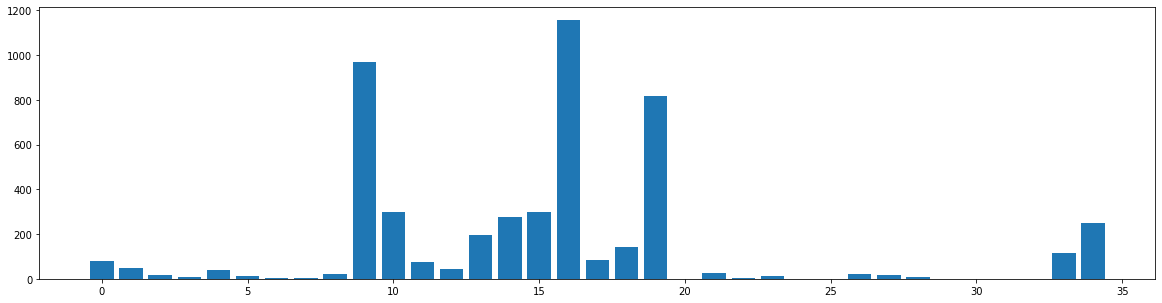

In [98]:
# plot the scores
pyplot.figure(figsize=(20,5))
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Based on the above, there are at least 3 most relevance features for target h1n1_vaccine which are **Feature 9 (doctor_recc_h1n1), Feature 16 (opinion_h1n1_risk) and Feature 19 (opinion_seas_risk)**. Other 5 features also quite significant which include **Feature 10 (doctor_recc_seasonal), Feature 13,14,15 (health_worker,health_insurance, opinion_h1n1_vacc_effective) and Feature 34 (employment_occupation)**

### Relevance Features for Seasonal Vaccine Target

In [99]:
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=8)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# train & test (using train dataset)
X_train, X_test, y_train,y_test = train_test_split(x_seasonal.drop(columns=['respondent_id']), y_seasonal, test_size=0.30, random_state=1)

#prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

In [100]:
# scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 233.354700
Feature 1: 84.317506
Feature 2: 0.236468
Feature 3: 28.238153
Feature 4: 36.735231
Feature 5: 38.205083
Feature 6: 48.315563
Feature 7: 18.482763
Feature 8: 74.426828
Feature 9: 588.331091
Feature 10: 1578.808672
Feature 11: 356.965083
Feature 12: 4.025268
Feature 13: 240.590911
Feature 14: 185.029711
Feature 15: 271.848345
Feature 16: 988.064783
Feature 17: 12.419824
Feature 18: 898.940531
Feature 19: 2843.313894
Feature 20: 126.430584
Feature 21: 1358.894002
Feature 22: 15.582098
Feature 23: 55.611729
Feature 24: 48.722407
Feature 25: 20.095950
Feature 26: 27.980079
Feature 27: 145.337949
Feature 28: 10.692771
Feature 29: 17.090795
Feature 30: 8.670066
Feature 31: 19.590743
Feature 32: 113.988834
Feature 33: 438.270825
Feature 34: 493.577408


In [101]:
x_seasonal.drop(columns=['respondent_id']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24870 entries, 0 to 24869
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   h1n1_concern                 24870 non-null  int64 
 1   h1n1_knowledge               24870 non-null  int64 
 2   behavioral_antiviral_meds    24870 non-null  int64 
 3   behavioral_avoidance         24870 non-null  int64 
 4   behavioral_face_mask         24870 non-null  int64 
 5   behavioral_wash_hands        24870 non-null  int64 
 6   behavioral_large_gatherings  24870 non-null  int64 
 7   behavioral_outside_home      24870 non-null  int64 
 8   behavioral_touch_face        24870 non-null  int64 
 9   doctor_recc_h1n1             24870 non-null  int64 
 10  doctor_recc_seasonal         24870 non-null  int64 
 11  chronic_med_condition        24870 non-null  int64 
 12  child_under_6_months         24870 non-null  int64 
 13  health_worker                24

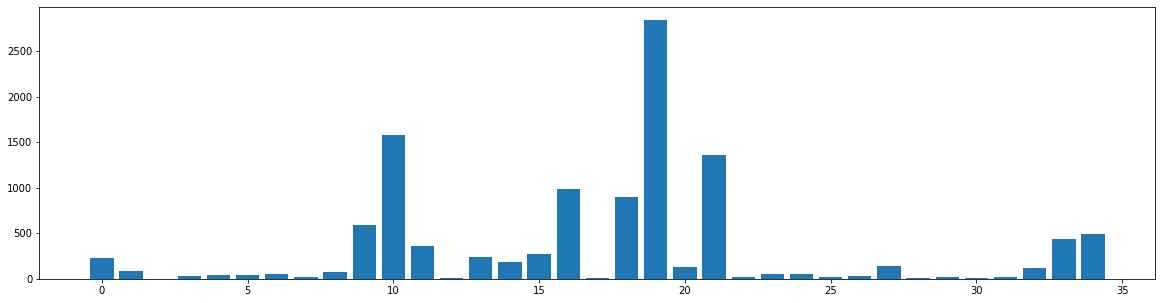

In [102]:
# plot the scores
pyplot.figure(figsize=(20,5))
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Based on the above, there are at least 3 most relevance features for target seasonal_vaccine which are **Feature 10 (doctor_recc_seasonal), Feature 19 (opinion_seas_risk) and Feature 21 (age_group)**.Other 5 features also quite significant which include **Feature 9 (doctor_recc_h1n1), Feature 16, Feature 18 (opinion_h1n1_risk,opinion_seas_vacc_effective) and Feature 34 % Feature 34(employment_industry,employment_occupation)**

### Accuracy Based on 8 Most Relevance Features for H1NI Vaccine Target

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [104]:
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=8)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# train & test (using train dataset)
X_train, X_test, y_train,y_test = train_test_split(x_h1n1.drop(columns=['respondent_id']), y_h1n1, test_size=0.30, random_state=1)

#prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

# fit the model
#model = DecisionTreeClassifier()#73.39
model = RandomForestClassifier()#74.39
#model = MLPClassifier()#75.77
model.fit(X_train_fs, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy considering 8 most relevance features: %.2f' % (accuracy*100))

Accuracy considering 8 most relevance features: 74.48


In [105]:
#Confirming accuracy using 10 folds of cross validation
cross_val_score(model, X_train_fs, y_train_enc, cv=10).mean().round(4)

0.7633

### Accuracy Based on All Features for H1NI Vaccine Target

In [106]:
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# train & test (using train dataset)
X_train, X_test, y_train,y_test = train_test_split(x_h1n1.drop(columns=['respondent_id']), y_h1n1, test_size=0.30, random_state=1)

#prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

# fit the model
#model = DecisionTreeClassifier()#70.34
model = RandomForestClassifier()#77.86
#model = MLPClassifier()#74.33
model.fit(X_train_fs, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy considering all features: %.2f' % (accuracy*100))

Accuracy considering all features: 77.65


In [107]:
#Confirming accuracy using 10 folds of cross validation
cross_val_score(model, X_train_fs, y_train_enc, cv=10).mean().round(4)

0.7971

### Accuracy Based on 8 Most Relevance Features for Seasonal Vaccine Target

In [108]:
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=8)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# train & test (using train dataset)
X_train, X_test, y_train,y_test = train_test_split(x_seasonal.drop(columns=['respondent_id']), y_seasonal, test_size=0.30, random_state=1)

#prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

# fit the model
#model = DecisionTreeClassifier() #76.01
model = RandomForestClassifier() #77.46
#model = MLPClassifier() #76.72
model.fit(X_train_fs, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy considering 8 most relevance features: %.2f' % (accuracy*100))

Accuracy considering 8 most relevance features: 77.20


In [109]:
#Confirming accuracy using 10 folds of cross validation
cross_val_score(model, X_train_fs, y_train_enc, cv=10).mean().round(4)

0.7797

### Accuracy Based on All Features for Seasonal Vaccine Target

In [110]:
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# train & test (using train dataset)
X_train, X_test, y_train,y_test = train_test_split(x_seasonal.drop(columns=['respondent_id']), y_seasonal, test_size=0.30, random_state=1)

#prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

# fit the model
#model = DecisionTreeClassifier()#76.52
model = RandomForestClassifier()#83.62
#model = MLPClassifier() #77.63
model.fit(X_train_fs, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy considering all features: %.2f' % (accuracy*100))

Accuracy considering all features: 83.22


In [111]:
#Confirming accuracy using 10 folds of cross validation
cross_val_score(model, X_train_fs, y_train_enc, cv=10).mean().round(4)

0.8287

## Model Evaluation Based on Selected Features

The above result show that **Random Forest Classifier** give the highest accuracy by using all features instead of 8 most relevant features . Though to avoid bias and overfitting, the prediction model will use only 8 most significant features as reflected earlier. Model being evaluate by comparing accuracy score considering the following ; <br>
1. 8 most relevance features and all features score using 3 different machine learning model
2. 3 machine learning model used are Decision Tree, Random Forest and Multi-layer Perceptron classifier

## Vaccine Receiver Prediction

### Prediction for H1N1 Vaccine Receiver

In [112]:
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# train data (using all train & train label dataset)
X_train = x_h1n1.drop(columns=['respondent_id'])
y_train = y_h1n1

# test data (using all test dataset)
X_test = test.drop(columns=['respondent_id'])

#prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

# fit the model
model = RandomForestClassifier()
model.fit(X_train_fs, y_train_enc)
# prediction
#yhat = model.predict(X_test_fs) # classification based prediction
yhat = model.predict_proba(X_test_fs) #probability based prediction


In [113]:
probability_h1n1=pd.DataFrame(yhat)
probability_h1n1=probability_h1n1[[0,1]].max(axis=1).values
probability_h1n1

array([0.55, 0.76, 0.54, ..., 0.57, 0.87, 0.78])

In [114]:
prediction=test[['respondent_id']]
prediction['h1n1_vaccine']=probability_h1n1
prediction

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,respondent_id,h1n1_vaccine
0,26707,0.55
1,26708,0.76
2,26709,0.54
3,26710,0.89
4,26711,0.50
...,...,...
26703,53410,0.60
26704,53411,0.62
26705,53412,0.57
26706,53413,0.87


### Prediction for Seasonal Vaccine Receiver

In [115]:
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# train data (using all train & train label dataset)
X_train = x_seasonal.drop(columns=['respondent_id'])
y_train = y_seasonal

# test data (using all test dataset)
X_test = test.drop(columns=['respondent_id'])

#prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

# fit the model
model = RandomForestClassifier()
model.fit(X_train_fs, y_train_enc)
# prediction
#yhat = model.predict(X_test_fs) # classification based prediction
yhat = model.predict_proba(X_test_fs) #probability based prediction


In [116]:
probability_seasonal=pd.DataFrame(yhat)
probability_seasonal=probability_seasonal[[0,1]].max(axis=1).values
probability_seasonal

array([0.55, 0.86, 0.73, ..., 0.56, 0.61, 0.77])

In [117]:
prediction['seasonal_vaccine']=probability_seasonal
prediction

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.55,0.55
1,26708,0.76,0.86
2,26709,0.54,0.73
3,26710,0.89,0.93
4,26711,0.50,0.57
...,...,...,...
26703,53410,0.60,0.57
26704,53411,0.62,0.55
26705,53412,0.57,0.56
26706,53413,0.87,0.61


In [118]:
#prediction.to_csv('h1n1_seasonal_predict_8_relevance_features_based.csv',index=False)

# Question 5b : Findings Analysis

## Findings for Predicted H1N1 Vaccine Receiver

In [119]:
prediction[['h1n1_vaccine']].describe().T

,count,mean,std,min,25%,50%,75%,max
h1n1_vaccine,26708.0,0.729714,0.127027,0.5,0.62,0.73,0.83,1.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f49b8f9e438>],
      dtype=object)

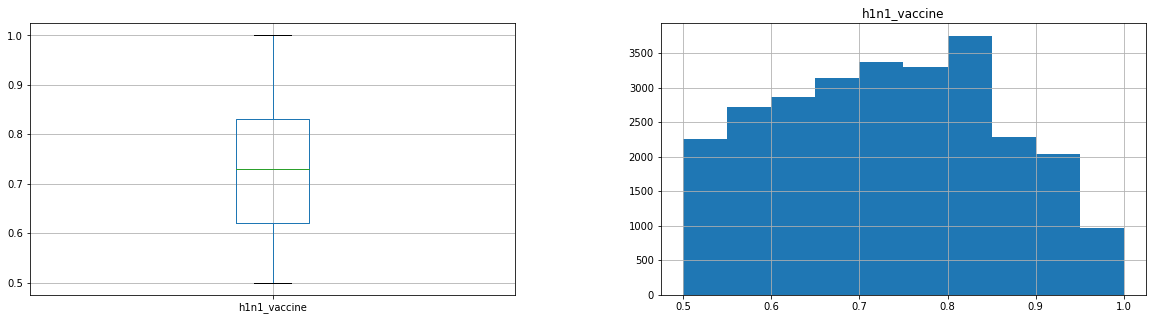

In [120]:
import matplotlib
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2 ,figsize=[20,5])

prediction[['h1n1_vaccine']].boxplot(ax=axes[0])
prediction[['h1n1_vaccine']].hist(ax=axes[1])

In [121]:
#Profile within the IQR

IQR_H1N1=prediction[(prediction['h1n1_vaccine']>=0.63 )& (prediction['h1n1_vaccine']<=0.83)][['respondent_id','h1n1_vaccine']]
IQR_H1N1

,respondent_id,h1n1_vaccine
1,26708,0.76
6,26713,0.63
11,26718,0.70
12,26719,0.64
13,26720,0.83
...,...,...
26696,53403,0.67
26697,53404,0.68
26700,53407,0.83
26702,53409,0.83


In [122]:
IQR_H1N1=pd.merge(IQR_H1N1,test, how='left',on='respondent_id')
IQR_H1N1

,respondent_id,h1n1_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26708,0.76,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,1,4,1,1,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
1,26713,0.63,2,2,0,1,0,1,1,0,1,1,1,0,0,0,0,4,2,4,3,1,2,65+ Years,College Graduate,White,Male,"> $75,000",Married,Own,Not in Labor Force,fpwskwrf,"MSA, Not Principle City",1.0,0.0,na,na
2,26718,0.70,1,2,0,1,0,1,0,0,0,0,0,0,0,0,1,5,2,1,4,4,1,18 - 34 Years,College Graduate,White,Female,"> $75,000",Not Married,Own,Employed,fpwskwrf,"MSA, Principle City",0.0,0.0,arjwrbjb,hfxkjkmi
3,26719,0.64,2,1,0,1,0,1,0,1,1,0,1,0,0,1,1,4,1,4,5,2,1,65+ Years,< 12 Years,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,dqpwygqj,"MSA, Not Principle City",0.0,0.0,fcxhlnwr,mxkfnird
4,26720,0.83,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,4,2,2,5,2,4,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,mfikgejo,hfxkjkmi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13536,53403,0.67,2,1,0,1,0,1,1,1,0,0,0,0,0,0,0,5,3,3,3,3,3,55 - 64 Years,12 Years,Other or Multiple,Female,"> $75,000",Not Married,Rent,Unemployed,qufhixun,"MSA, Principle City",0.0,2.0,na,na
13537,53404,0.68,3,1,0,1,0,1,0,0,0,0,0,0,0,1,0,4,2,2,5,4,1,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,bhuqouqj,"MSA, Principle City",0.0,0.0,fcxhlnwr,bxpfxfdn
13538,53407,0.83,1,1,0,1,0,0,0,0,1,0,0,1,1,0,1,3,1,2,2,2,2,45 - 54 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",3.0,1.0,dotnnunm,hfxkjkmi
13539,53409,0.83,1,1,0,1,1,1,1,1,1,0,0,0,1,0,1,4,1,2,4,1,1,55 - 64 Years,< 12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,xicduogh,xtkaffoo


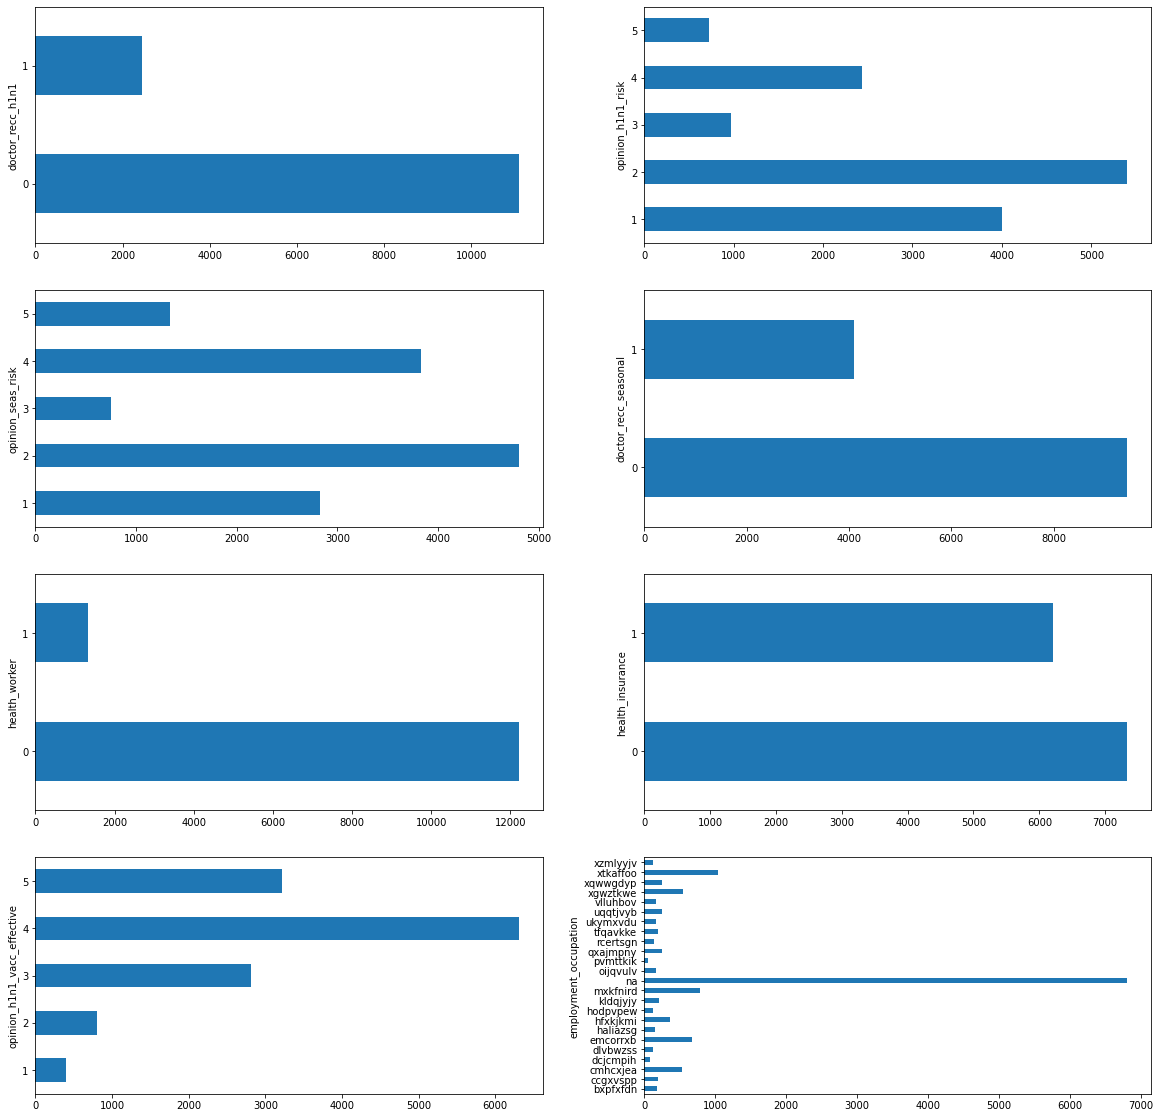

In [123]:
#based on 8 most relevance features

import matplotlib
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=2 ,figsize=[20,20])

IQR_H1N1.groupby('doctor_recc_h1n1')['respondent_id'].count().plot.barh(ax=axes[0,0])
IQR_H1N1.groupby('opinion_h1n1_risk')['respondent_id'].count().plot.barh(ax=axes[0,1])
IQR_H1N1.groupby('opinion_seas_risk')['respondent_id'].count().plot.barh(ax=axes[1,0])
IQR_H1N1.groupby('doctor_recc_seasonal')['respondent_id'].count().plot.barh(ax=axes[1,1])
IQR_H1N1.groupby('health_worker')['respondent_id'].count().plot.barh(ax=axes[2,0])
IQR_H1N1.groupby('health_insurance')['respondent_id'].count().plot.barh(ax=axes[2,1])
IQR_H1N1.groupby('opinion_h1n1_vacc_effective')['respondent_id'].count().plot.barh(ax=axes[3,0])
IQR_H1N1.groupby('employment_occupation')['respondent_id'].count().plot.barh(ax=axes[3,1])

## Findings for Predicted Seasonal Vaccine Receiver

In [124]:
prediction[['seasonal_vaccine']].describe().T

,count,mean,std,min,25%,50%,75%,max
seasonal_vaccine,26708.0,0.742627,0.13374,0.5,0.63,0.75,0.85,1.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4995d660f0>],
      dtype=object)

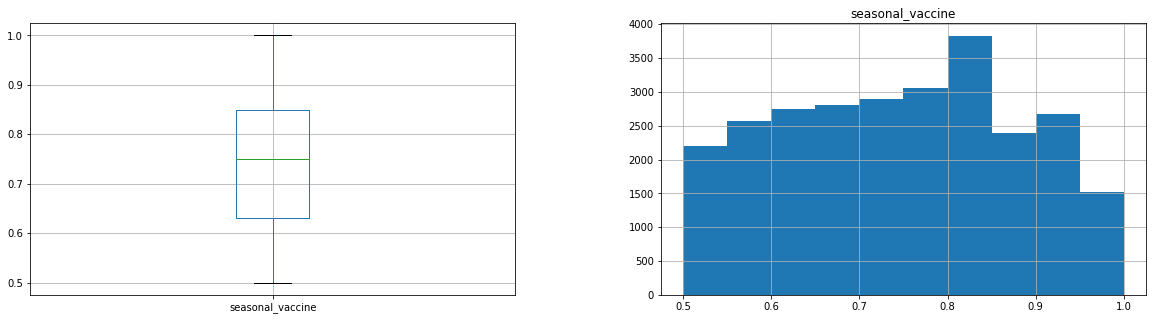

In [125]:
import matplotlib
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2 ,figsize=[20,5])

prediction[['seasonal_vaccine']].boxplot(ax=axes[0])
prediction[['seasonal_vaccine']].hist(ax=axes[1])

In [126]:
#Profile within the IQR

IQR_Seasonal=prediction[(prediction['seasonal_vaccine']>=0.63 )& (prediction['seasonal_vaccine']<=0.85)][['respondent_id','seasonal_vaccine']]
IQR_Seasonal

,respondent_id,seasonal_vaccine
2,26709,0.73
6,26713,0.73
7,26714,0.74
11,26718,0.69
14,26721,0.65
...,...,...
26698,53405,0.77
26700,53407,0.70
26701,53408,0.67
26702,53409,0.85


In [127]:
IQR_Seasonal=pd.merge(IQR_Seasonal,test, how='left',on='respondent_id')
IQR_Seasonal

,respondent_id,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26709,0.73,2,2,0,0,1,1,1,1,1,0,0,0,0,0,0,5,4,2,5,4,4,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
1,26713,0.73,2,2,0,1,0,1,1,0,1,1,1,0,0,0,0,4,2,4,3,1,2,65+ Years,College Graduate,White,Male,"> $75,000",Married,Own,Not in Labor Force,fpwskwrf,"MSA, Not Principle City",1.0,0.0,na,na
2,26714,0.74,2,1,0,1,0,1,0,0,1,0,0,0,0,0,1,5,1,2,4,1,1,55 - 64 Years,Some College,White,Male,"<= $75,000, Above Poverty",Married,Own,Unemployed,oxchjgsf,"MSA, Not Principle City",1.0,0.0,na,na
3,26718,0.69,1,2,0,1,0,1,0,0,0,0,0,0,0,0,1,5,2,1,4,4,1,18 - 34 Years,College Graduate,White,Female,"> $75,000",Not Married,Own,Employed,fpwskwrf,"MSA, Principle City",0.0,0.0,arjwrbjb,hfxkjkmi
4,26721,0.65,1,2,1,0,0,0,0,0,0,1,1,1,0,0,0,5,1,1,5,2,1,18 - 34 Years,Some College,White,Male,Below Poverty,Not Married,Rent,Employed,fpwskwrf,Non-MSA,1.0,1.0,rucpziij,tfqavkke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13661,53405,0.77,2,1,0,1,0,1,1,1,1,0,0,0,0,0,1,3,3,1,5,4,1,45 - 54 Years,Some College,White,Female,"> $75,000",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",1.0,0.0,arjwrbjb,hfxkjkmi
13662,53407,0.70,1,1,0,1,0,0,0,0,1,0,0,1,1,0,1,3,1,2,2,2,2,45 - 54 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",3.0,1.0,dotnnunm,hfxkjkmi
13663,53408,0.67,1,1,1,1,0,1,1,1,1,0,0,0,0,1,1,4,1,2,1,2,4,18 - 34 Years,12 Years,Hispanic,Female,Below Poverty,Not Married,Own,Employed,oxchjgsf,Non-MSA,0.0,3.0,fcxhlnwr,haliazsg
13664,53409,0.85,1,1,0,1,1,1,1,1,1,0,0,0,1,0,1,4,1,2,4,1,1,55 - 64 Years,< 12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,xicduogh,xtkaffoo


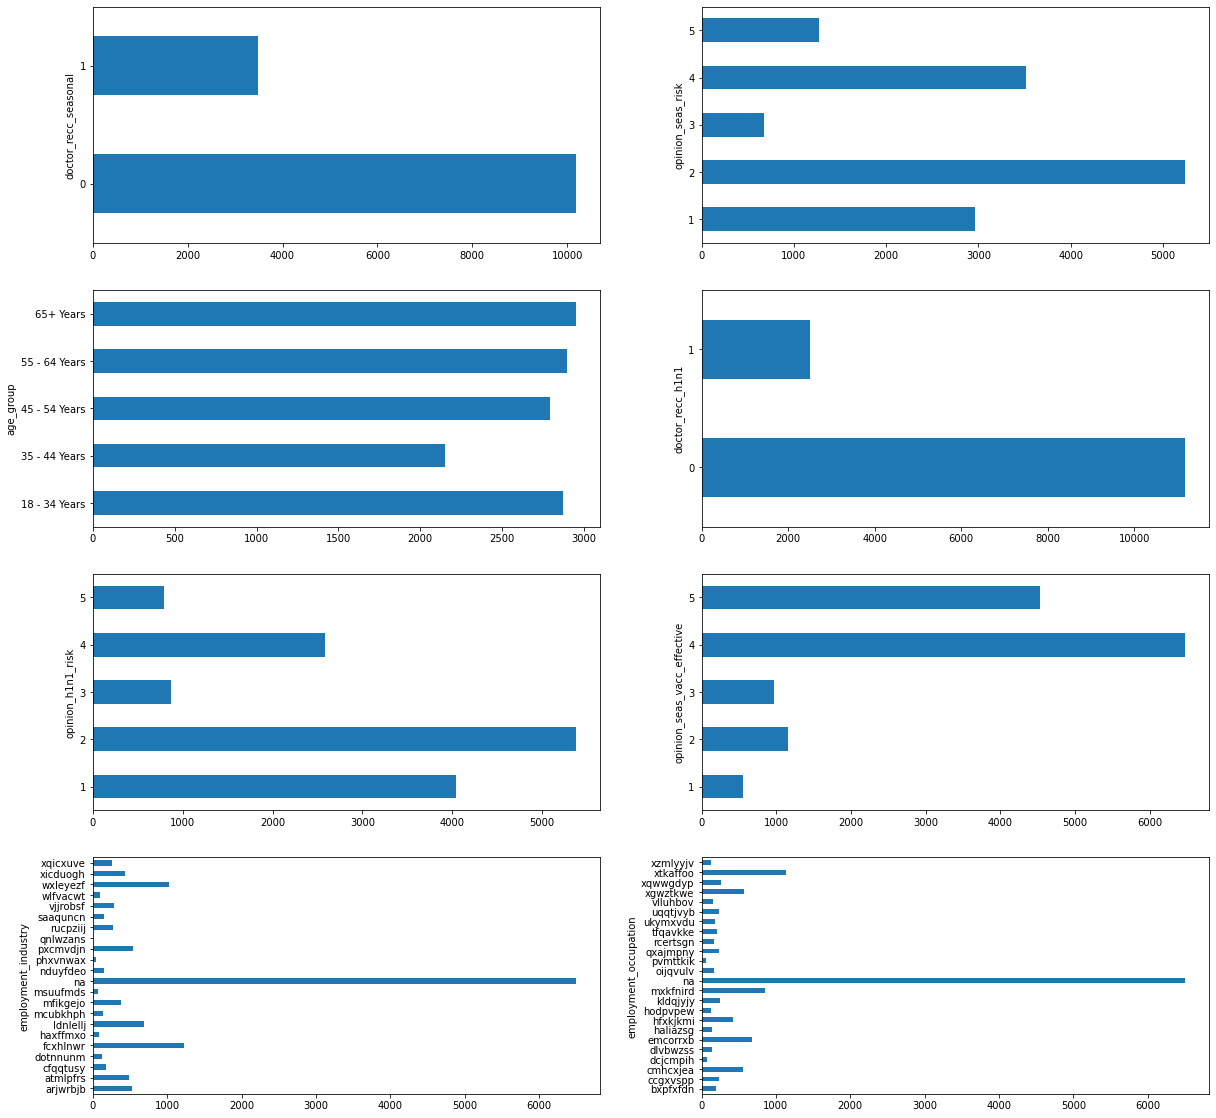

In [128]:
#based on 8 most relevance features

import matplotlib
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=2 ,figsize=[20,20])

IQR_Seasonal.groupby('doctor_recc_seasonal')['respondent_id'].count().plot.barh(ax=axes[0,0])
IQR_Seasonal.groupby('opinion_seas_risk')['respondent_id'].count().plot.barh(ax=axes[0,1])
IQR_Seasonal.groupby('age_group')['respondent_id'].count().plot.barh(ax=axes[1,0])
IQR_Seasonal.groupby('doctor_recc_h1n1')['respondent_id'].count().plot.barh(ax=axes[1,1])
IQR_Seasonal.groupby('opinion_h1n1_risk')['respondent_id'].count().plot.barh(ax=axes[2,0])
IQR_Seasonal.groupby('opinion_seas_vacc_effective')['respondent_id'].count().plot.barh(ax=axes[2,1])
IQR_Seasonal.groupby('employment_industry')['respondent_id'].count().plot.barh(ax=axes[3,0])
IQR_Seasonal.groupby('employment_occupation')['respondent_id'].count().plot.barh(ax=axes[3,1])